# Data Creation, Exploration, and Preprocessing

## 1) Topic

### 1.1) Research Question
The original research question that was handed to us was "Assemble the next big blockbuster film", alongside a dataset of the top 1000 rated movies on IMDB. We were given a lot of freedom in how we interpret and approach this research question, and after brainstorming, we came up with some modifications.

This is the way in which we decided to approach our project:
- We imagine that a client come to us, lets say they're a movie director, and they wish to know whether the movie they are working on /plan to work on will become a blockbuster.
- The client has information on the movie itself, i.e. what genre of movie it will be, what actors will star in it, etc.
- We must define what a blockbuster is, and then use the movie's features to predict whether or not it will be a blockbuster.

Ultimately, our research question boils down to: **Can we predict whether or not a movie will be a blockbuster, based on its characteristcs?**

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 1.2) Defining a blockbuster
We will define what makes a blockbuster movie with two key factors: a high gross income, and a high average IMDB rating. We will decide on what we consider a "high gross income" and a "high average IMDB rating" after we're finished with the EDA, and have a good understanding of the specifics of our dataset. 

Using gross income and average IMDB rating as our criteria, we also identified other types of movies using a 2x2 decision matrix: 

|     | Low Gross Income | High Gross Income |
|-----|---|---|
| **Low IMDB Rating**   | Flop | Critically-Disliked Blockbuster |
| **High IMDB Rating**   | Hidden Gem | Critically-Acclaimed Blockbuster |

One could make the argument that a high gross income could be the sole qualifier of a blockbuster: who cares about how a movie is perceived, as long as it makes a lot of money, right? To this we say no, the rating/perception of the movie does most certainly matter, especially when it comes to potential future sequels, remakes, and spinoffs. The rating/perception of a debut movie is also imperative when attempting to establish a movie franchise.

A few reasons why sequels, remakes, spinoffs, and franchises are so commonplace in the movie industry nowadays is that they often come with a pre-existing fan-base, which reduces financial risk, and raises the bottom line due to decreased marketing costs.

For these reasons, it may be a big difference for an incoming client if they find out if their movie will be well-received and high grossing, or poorly-received and high grossing. This is why we chose both average IMDB rating and gross income as criteria for a blockbuster film.

***References for this section:***
- ChatGPT: https://chatgpt.com/share/68421155-da28-800d-a405-f2efa0247e4d

<hr style="height:2px;border-width:0;color:red;background-color:red">

## 2) Dataset Creation

### 2.1) Original Dataset

Originally, we were going to use the dataset provided to us which contains 1000 movies with the highest IMDB score on the IMDB website. However, this dataset was quite limited:
- Low sample size of 1000 movies
- Not many features (11)
- Low variance on the average IMDB rating, the range was [7.6, 9.3]. We thought this wouldn't be representative of all movies, especially those that do not perform as well
For these reasons, we asked for help in scraping additional information.

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 2.2) Webscraping
Maria was able to help us by reusing an IMDB webscaper she had previously designed, and with Chris' help they were able to have it scrape the director, the top 4 actors, the storyline, the story tags, and the gross worldwide income for any movie, provided its tconst i.e. its unique identifier.

Maria also provided us with two zip files, title.basic.zip and title.ratings.zip. These both contain entries of movies, episodes, and TV shows from the IMDB website. The former has 11.5 million rows and contains basic info such as name, genre, release date, etc., while the latter contains 1.5 million rows and contains IMDB score and number of votes. Using the python program in aux_files/merge_datasets_pre.py, we:
- Combined the two datasets
- Filtered out non-movie entries
- Filtered out entries released before the year 2020
This left us with 54,095 movies. We saved this dataset to datasets/54000_movies_dataset_prelim.csv. This was a preliminary version of the data, as we still needed to run it through the webscraper in aux_files/webscraper.py to receive the additional features.

We then ran the webscraper on the dataset over multiple days/nights during the weekend, using checkpoints to save the data cumulatively due to random internet outtages (these were saved to datasets/webscraper_checkpoints). After scraping all 54000 movies, we combined the latest checkpoints using aux_files/merge_datasets_post.py into our final dataset which we stored in datasets/54000_movies_dataset.py.

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 2.3) Webscraping Demo
Here is a short demo of the webscraper, alongside the data it returns:

In [1]:
import sys
# Change path to aux_files directory which contains webscraper.py
sys.path.append("aux_files")

In [2]:
# find_first_key and extract_gross_worldwide are helper functions to scrape_imdb_to_df
from webscraper import find_first_key, extract_gross_worldwide, scrape_imdb_to_df

The scrape_imdb_to_df function takes a list of tconsts i.e. movie IDS as the argument. These tconsts are actually identifiers used by IMDB in the movie's URL e.g. Shawshank Redemptions tconst is tt0111161, so its webpage URL is https://www.imdb.com/title/tt0111161/.

Lets use the tconsts of the top five movies with the highest IMDB score released in the last five years to scrape their information:

In [3]:
dune_part_2_tconst = "tt15239678"
the_wild_robot_tconst = "tt29623480"
top_gun_maverick_tconst = "tt1745960"
sinners_tconst = "tt31193180"
bring_her_back_tconst = "tt32246771"

demo_tconst_list = [dune_part_2_tconst, the_wild_robot_tconst, top_gun_maverick_tconst, sinners_tconst, bring_her_back_tconst]

demo_dataset = scrape_imdb_to_df(demo_tconst_list, checkpoints = False)

100%|█████████████████████████████████████████████| 5/5 [00:07<00:00,  1.54s/it]


In [4]:
demo_dataset.columns

Index(['tconst', 'storyline', 'themes', 'director', 'actors',
       'gross_worldwide'],
      dtype='object')

In [5]:
demo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tconst           5 non-null      object
 1   storyline        5 non-null      object
 2   themes           5 non-null      object
 3   director         5 non-null      object
 4   actors           5 non-null      object
 5   gross_worldwide  5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes


In [6]:
demo_dataset[:]

,tconst,storyline,themes,director,actors,gross_worldwide
0,tt15239678,I saw Dune 2 on an XD screen and sound system....,"[desert, space opera, desert planet, epic sci ...",Denis Villeneuve,"[Timothée Chalamet, Zendaya, Rebecca Ferguson]","$714,644,358"
1,tt29623480,DreamWorks managed to bring back the magic of ...,"[robot, talking robot, fox, robot as protagoni...",Chris Sanders,"[Lupita Nyong&apos;o, Pedro Pascal, Kit Connor]","$333,165,945"
2,tt1745960,"I was reluctantly dragged into the theater, th...","[fighter jet, aircraft carrier, dogfight, nava...",Joseph Kosinski,"[Tom Cruise, Jennifer Connelly, Miles Teller]","$1,495,696,292"
3,tt31193180,"First of all: this is not a horrible movie, bu...","[1930s, supernatural horror, period horror, va...",Ryan Coogler,"[Michael B. Jordan, Miles Caton, Saul Williams]","$363,955,712"
4,tt32246771,The Philippou&apos;s brothers have again creat...,"[gore, supernatural horror, foster care, loss ...",Danny Philippou,"[Billy Barratt, Sally Hawkins, Mischa Heywood]","$22,082,489"


One thing of note is that currently the storyline contains a random review alongside it, due to the way the data was scraped. We will remove this review later in the notebook in the preprocessing section, if we indeed choose to use the storyline column in our model.

***References for this section:***
- ChatGPT: https://chatgpt.com/share/6842096e-b2d4-800d-8041-2bfc88a793c8

---
## 3) Exploratory Data Analysis

**<u>Importing Libraries</u>**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import ast 
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from collections import defaultdict
from itertools import combinations
from scipy.stats import pearsonr, spearmanr
from matplotlib import cm, colors

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.1) Getting to know the data

First lets read in the dataset and examine an item from it:

In [8]:
movie_dataset = pd.read_csv("datasets/54000_movies_dataset.csv")
print(movie_dataset.iloc[0])

Unnamed: 0                                                       0.0
tconst                                                     tt0062336
averageRating                                                    6.4
numVotes                                                         236
titleType                                                      movie
primaryTitle       The Tango of the Widower and Its Distorting Mi...
originalTitle              El tango del viudo y su espejo deformante
isAdult                                                            0
startYear                                                       2020
endYear                                                           \N
runtimeMinutes                                                    70
genres                                                         Drama
storyline                                                        NaN
themes             ['suicide', 'ghost', 'schizophrenic', 'santiag...
director                          

Lets first change the name of the gross_worldwide column to grossWorldwide, so that it matches the naming convention held by the other columns:

In [9]:
movie_dataset = movie_dataset.rename(columns = {"gross_worldwide": "grossWorldwide"})
movie_dataset.columns

Index(['Unnamed: 0', 'tconst', 'averageRating', 'numVotes', 'titleType',
       'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres', 'storyline', 'themes', 'director', 'actors',
       'grossWorldwide'],
      dtype='object')

---
**<u>Row Removal</u>**

Next, we lets examine the columns and see if there are any missing entries:

In [73]:
print(movie_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7569 entries, 17 to 54094
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averageRating   7569 non-null   float64
 1   numVotes        7569 non-null   int64  
 2   primaryTitle    7569 non-null   object 
 3   isAdult         7569 non-null   int64  
 4   startYear       7569 non-null   int64  
 5   runtimeMinutes  7569 non-null   int64  
 6   genres          7569 non-null   object 
 7   storyline       6458 non-null   object 
 8   themes          7569 non-null   object 
 9   director        7569 non-null   object 
 10  actors          7569 non-null   object 
 11  grossWorldwide  7569 non-null   int64  
 12  movieType1M     7569 non-null   object 
 13  movieType100M   7569 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 887.0+ KB
None


The dataset includes 17 columns, Out of these, 'Unnamed: 0' is missing 3000 values, 'storyline' is missing 26301 values, 'director' is missing 806 values, and 'grossWorldwide' is missing 42032 values.

Since grossWorldwide will be one of the criteria for what defines a blockbuster movie, we will drop any movies that have a missing value in this column. This might impact the distribution of the dataset, as we hypothesise that it will be unpopular movies that are dropped due to not making any money at the box office. For this reason lets first visualise the number of votes, a proxy for popularity, for the entire 54k dataset, and then compare it to the distribution after removing the null grossWorldwide values.

***Note:*** All graphs in this notebook had a colour map added based off of the following ChatGPT conversation
https://chatgpt.com/share/6853f0a5-de44-800d-9e1c-c14af240c172

Text(0, 0.5, 'Frequency')

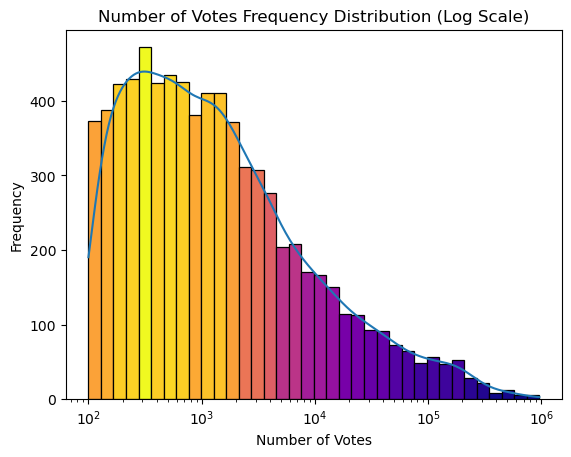

In [74]:
ax = sns.histplot(movie_dataset["numVotes"], log_scale = True, kde = True)

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.plasma

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Number of Votes Frequency Distribution (Log Scale)")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")

In [75]:
movie_dataset = movie_dataset.dropna(subset = ["grossWorldwide"])
print(movie_dataset.shape)

(7569, 14)


Now lets once again plot the number of votes to see if the distribution is any different:

Text(0, 0.5, 'Frequency')

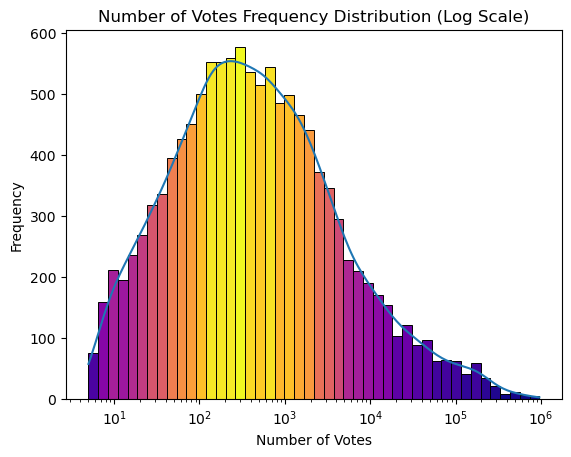

In [13]:
ax = sns.histplot(movie_dataset["numVotes"], log_scale = True, kde = True)

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.plasma

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Number of Votes Frequency Distribution (Log Scale)")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")

As expected, the distribution is skewed more positively after removing the null grossWorldwide values. This indicates that we were indeed correct in predicting that it tends to be the less popular movies that do not have a gross income (as opposed to say a bug in the webscraper.py which periodically doesn't capture gross income, or something like that).

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.3) Column Removal

After further visual examinination of the dataset, we decided to remove several columns from the feature space for inefficiency or redundancy reasons. Removing these columns very early on is necessary so that the exploratory data analysis properly represents the data that will be used for the model. The columns that will be removed are:

 - **tconst** : Unique movie identifier, used in webpage specific to that movie. This is unnecessary. 
 
 - **titleType**: This column was present in title.basics.zip and used in aux_files/merge_datasets_pre.py to filter out non-movies from the dataset. Hence, in the current dataset this column only contains "movie", and is hence irrelevant for our analysis.
 
 - **Unnamed: 0**: A mistake column generated when scraping the data. This column has index values that would be linearly dependent with tconst and movie names. 
 
 - **originalTitle**: Again, completely linearly dependent with the movie name (just in the native language of the movie). Hence, this column brings no valuable information to our analysis or model. 
 
 - **endYear:** This information was for TV shows and hence was the same as the start year (or just 1 year incremented) which was not only mostly redundant to start year, but is also a piece of information that is revealed after the box office (the box office increase ends at the end date of the movie showings) and hence including this column would be predicting the past from the future. So, it would be in our opinion cheating and would violate our imaged scenario: a client wouldn't have this sort of information about the movie they want to make.

In [14]:
movie_dataset = movie_dataset.drop(labels = ["tconst", "titleType", "Unnamed: 0", "originalTitle", "endYear"], axis = 1)
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12063 entries, 17 to 54094
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averageRating   12063 non-null  float64
 1   numVotes        12063 non-null  int64  
 2   primaryTitle    12063 non-null  object 
 3   isAdult         12063 non-null  int64  
 4   startYear       12063 non-null  int64  
 5   runtimeMinutes  12063 non-null  object 
 6   genres          12063 non-null  object 
 7   storyline       8197 non-null   object 
 8   themes          12063 non-null  object 
 9   director        11920 non-null  object 
 10  actors          12063 non-null  object 
 11  grossWorldwide  12063 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.2+ MB


<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.4) Data Types Analysis

For further analysis, we must also ensure that the entries in certain columns have the correct datatype:

In [15]:
movie_dataset["runtimeMinutes"].iloc[0:20]

17    110
18    104
23    144
31    106
32    127
34    121
35    122
37     97
38    109
40    131
41     88
46     98
53     87
54     \N
56    102
58     79
59    118
63    128
65    103
71     94
Name: runtimeMinutes, dtype: object

---
**<u>Runtime Column</u>**

The runtimeMintues column contains the occasional "\\N" string, which most likely refers to unknown runtime minutes for that movie. We will remove these rows as there aren't many of them. Also, we'll convert the values in the runtimeMinutes column to integers.

In [76]:
movie_dataset = movie_dataset[movie_dataset["runtimeMinutes"] != "\\N"]
movie_dataset["runtimeMinutes"] = movie_dataset["runtimeMinutes"].astype("int64")
movie_dataset.shape

(7569, 14)

---
**<u>Gross Worldwide Column</u>**

Next, lets have a look at the grossWorldwide column:

In [17]:
movie_dataset["grossWorldwide"].iloc[0:20]

17     $84,426,031
18      $5,928,351
23    $271,433,313
31     $29,303,571
32    $220,889,446
34         $10,303
35     $95,779,142
37        $106,045
38     $49,447,308
40      $6,682,648
41      $4,311,042
46         $34,666
53          $6,391
56        $151,054
58         $19,262
59     $21,786,275
63     $30,842,746
65        $918,510
71        $318,877
72      $5,120,794
Name: grossWorldwide, dtype: object

This column contains entries in the form of strings. We need to change these to integers to be able to visualise this column, but first we'll check to see if all grossWorldwide entries are in dollars:

In [18]:
for entry in movie_dataset["grossWorldwide"]:
    if entry.strip()[0] != "$":
        print(entry)

₹23,000,000
₹77,500,000
€1,597,294


There are two entries in Indian Rupee, and one entry in euro. To accurately translate these to American Dollars, we'll find the market exchange rate for the year in which the movies were released.

In [19]:
print(movie_dataset["startYear"][movie_dataset["grossWorldwide"] == "₹23,000,000"])
print(movie_dataset["startYear"][movie_dataset["grossWorldwide"] == "₹77,500,000"])
print(movie_dataset["startYear"][movie_dataset["grossWorldwide"] == "€1,597,294"])

2438    2023
Name: startYear, dtype: int64
13368    2021
Name: startYear, dtype: int64
27699    2022
Name: startYear, dtype: int64


We found the average yearly exchange rates on the following websites:
- Indian Rupee to USD 2023: 1 Rupee = 0.01211 (https://www.exchange-rates.org/exchange-rate-history/inr-usd-2023)
- Indian Rupee to USD 2021: 1 Rupee = 0.01353 USD (https://www.exchange-rates.org/exchange-rate-history/inr-usd-2021)
- Euro to USD 2022: 1 Euro = 1.0538 USD (https://www.exchangerates.org.uk/EUR-USD-spot-exchange-rates-history-2022.html)

We'll now apply a function that changes each entry in grossWorldwide from a string to int, using regular expressions.

In [20]:
def dollar_string_to_int(entry):
    if entry == "₹23,000,000":
        return int(23000000 * 0.01211)
    elif entry == "₹77,500,000":
        return int(77500000 * 0.01353)
    elif entry == "€1,597,294":
        return int(1597294 * 1.0538)
    else:
        # Else currency is USD, can just remove commas and dollar sign and convert to return as int.
        cleaned_entry = re.sub(r"[^\w]", "", entry)
        return int(cleaned_entry)

movie_dataset["grossWorldwide"] = movie_dataset["grossWorldwide"].apply(dollar_string_to_int)

Now, lets see how many movies have made less than 10,000 USD gross income:

In [21]:
len(movie_dataset[movie_dataset["grossWorldwide"] < 10000])

2210

Since we're looking for blockbusters, movies such as these don't need to be included.

In [22]:
movie_dataset = movie_dataset[movie_dataset["grossWorldwide"] >= 10000]
len(movie_dataset)

9407

---
**<u>Numerical Columns</u>**

Next we'll examine the numerical columns by using describe():

In [23]:
print(movie_dataset.describe())

       averageRating       numVotes      isAdult    startYear  runtimeMinutes  \
count    9407.000000    9407.000000  9407.000000  9407.000000     9407.000000   
mean        6.078155    9507.838843     0.000106  2022.392793      105.703731   
std         1.210067   42901.291074     0.010310     1.444399       21.657354   
min         1.000000       5.000000     0.000000  2020.000000       12.000000   
25%         5.400000     143.000000     0.000000  2021.000000       91.000000   
50%         6.200000     573.000000     0.000000  2022.000000      101.000000   
75%         6.900000    2669.500000     0.000000  2024.000000      116.000000   
max         9.600000  959551.000000     1.000000  2025.000000      330.000000   

       grossWorldwide  
count    9.407000e+03  
mean     1.174808e+07  
std      7.647698e+07  
min      1.000500e+04  
25%      5.658400e+04  
50%      3.053500e+05  
75%      1.789920e+06  
max      2.320250e+09  


One thing of note is that there are movies that have an average IMDB rating of 9.6, which is unusual, as when you view the top 250 IMDB movies sorted by rating (https://www.imdb.com/chart/top/?ref_=nv_mv_250), the highest film is Shawshank Redemption with a score of 9.3. Let's examine some of these movies with an average rating higher than 9.3:

In [24]:
movie_dataset[movie_dataset["averageRating"] > 9.3]

,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,genres,storyline,themes,director,actors,grossWorldwide
9316,9.4,25,How to Thrive,0,2022,96,Documentary,&quot;How the Thrive&quot; is such an importan...,['mental health'],Duy Huynh,"['Marie McLeod', 'Rosie Mitchell', 'Samuel Ost...",34050
13177,9.5,69,Jaimen Hudson: From Sky to Sea,0,2021,90,Documentary,"Whether you know Jaimen or not, this documenta...",[],Leighton De Barros,"['Leighton De Barros', 'Jaimen Hudson', 'Jess ...",30501
39340,9.4,12,Day by Day: The Dynasty,0,2023,129,Documentary,NaN,[],Justin Le Pera,"['Brook Berringer', 'Tommie Frazier', 'Ahman G...",12929
40115,9.5,39,SEVENTEEN TOUR 'FOLLOW' to JAPAN: LIVE VIEWING,0,2023,210,"Documentary,Music",NaN,[],NaN,['Seventeen'],978580
47326,9.6,8,Baekhyun: Lonsdaleite [dot] in Cinemas,0,2024,90,Documentary,NaN,[],Kim Ha-min,['Byun Baekhyun'],203969
48172,9.5,12,Yoasobi 5th Anniversary Dome Live 2024 [cho-Ge...,0,2025,157,"Documentary,Music",NaN,[],NaN,"['Yoasobi', 'Ayase', 'Lilas Ikuta']",74106
48887,9.4,24,"Ado SPECIAL LIVE ""Shinzou"" in Cinema",0,2024,140,"Documentary,Music",NaN,[],Ruriko Kano,['Ado'],89763
49054,9.5,82,Il capo del mondo,0,2025,97,Comedy,NaN,[],Salvo Campisano,"['Vania Arena', 'Francesco Caltabiano', 'Salvo...",10645


Interestingly, almost all of these movies are documentaries. What could be some reasons for this average rating inflation? 

Of course, the number of votes is a factor. With a low number of votes each vote has a larger influence over the average, leading to increased variance, which might cause the sample to be non-representative of the entire population.

Another factor could be the genres of the movies themselves. Documentaries are different from other movies, in regards to the fact that the viewer typically knows exactly what the documentary will entail before watching it. This could lead to selection bias, which is a social phenomenon in which people who already like something or expect to like something are more likely to engage with it, and hence rate it highly, inflating ratings. With other movies, although the genre, actors, and directors may be known a priori to watching, significant factors such as plot and cinematography are unknown, leading to higher variance.

Another possible reason could be survivorship bias. Viewers that fully watch these movies and enjoy them might be more likely to rate the movie on IMDB, giving it a high rating. If someone did not enjoy the movie, they might simply move on, not deeming it necessary to give the movie a poor review. This, coupled with the low number of votes, could be another explanation for these inflated ratings. 

Source: https://www.fullstory.com/blog/selection-bias-in-data/

In order to attempt to minimalise these issues without removing a significant amount of our dataset, we'll remove all movies that have a number of votes less than 100.

In [25]:
len(movie_dataset[movie_dataset["numVotes"] < 100])

1819

In [26]:
movie_dataset = movie_dataset[movie_dataset["numVotes"] >= 100]
len(movie_dataset)

7588

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.5) Unique Values

The full functions that are going to be called in this section are in the directory "aux_files" in the file "unique_functions.py" - please reference this file if you wish to see these.

In [27]:
from unique_functions import unique_values, count_unique_values, unique_combos, first_n_unique, print_amount_unique

In order to further understand our data, it is important to have a function that allows us to view which unique values/words appear in the data. To generalize this rather than manually checking for each column, a function was made that takes the column name as input and returns every unique value that appears in that column. 

In [28]:
# Function called for genres column and themes columns since they have many categories
print(unique_values(movie_dataset, "genres"))

# Not displaying the themes output since there were too many unique values, suggesting the need for 
# feature engineering
# print(unique_values(movie_dataset, "themes"))

{'Animation', 'Biography', 'Western', 'News', 'Fantasy', 'Music', 'Romance', 'Talk-Show', 'Adventure', 'War', 'Action', 'Horror', 'Adult', 'History', 'Sci-Fi', 'Sport', '\\N', 'Family', 'Documentary', 'Comedy', 'Drama', 'Crime', 'Thriller', 'Musical', 'Mystery'}


Another way to understand the different values in each category is to use a dictionary that counts the number of occurrences of each unique value in a column. This function allows us to understand the distribution of unique values per column. For instance, by running this function with genres, it is clear that the majority of the movies are of the "Action" genre, and the least amount of "Talk-Show" and "Adult".

In [29]:
# By calling the function with genres it can be seen that many films share the same genre
print(count_unique_values(movie_dataset, "genres"))

# If the same function is called with directors, for instance, the set would be extremely 
# long since most directors appear once per movie, and at most 3 times
# print(count_unique_values(movie_dataset, "director"))

{'Action': 1237, 'Adventure': 731, 'Fantasy': 335, 'Comedy': 2532, 'Thriller': 1170, 'Family': 433, 'Horror': 867, 'Mystery': 529, 'Drama': 3949, 'Romance': 787, 'War': 105, 'Documentary': 522, 'Music': 242, 'Crime': 760, 'Animation': 425, 'Biography': 461, 'History': 355, 'Sci-Fi': 232, 'Sport': 139, 'Musical': 77, 'Western': 20, '\\N': 8, 'Adult': 1, 'News': 2, 'Talk-Show': 1}


Since some columns might have more than one value (e.g. the genre column might have an entry like "Action, Comedy"), we also wanted to have a function that would return all of these so that combinations could also be looked into, specifically for genre. This technique could prove useful if we end up wanting to explore whether movies have similar cast members.

In [30]:
# The only column with multiple values of interest is genres for this case
print(unique_combos(movie_dataset, "genres")[:20])

['Action,Adventure,Fantasy' 'Action,Comedy,Thriller'
 'Adventure,Comedy,Family' 'Action,Adventure,Comedy'
 'Horror,Mystery,Thriller' 'Action,Thriller' 'Drama,Thriller'
 'Fantasy,Horror,Mystery' 'Drama,Romance,War' 'Drama,Horror,Mystery'
 'Comedy,Drama' 'Comedy' 'Documentary,Music' 'Fantasy,Horror,Thriller'
 'Crime,Drama,Mystery' 'Crime,Drama' 'Action,Crime,Drama' 'Drama,Romance'
 'Drama' 'Comedy,Drama,Romance']


For the columns that have an enormous amount of unique values, it would be useful to have a way to display only some of these to have an idea of what the data looks like for those columns.

In [31]:
first_n_unique(10, movie_dataset)

First 10 unique values for column 'primaryTitle':
['Combat Wombat', 'The Bride in Red', 'Bezvetrije', 'Kill It and Leave This Town', 'Hey Sinamika', '13th District', 'Berend Botje', 'Sergio Leone: The Man Who Invented America', 'The Pool', '#Manhole']
First 10 unique values for column 'genres':
['Animation', 'Biography', 'Western', 'News', 'Fantasy', 'Music', 'Romance', 'Talk-Show', 'Adventure', 'War']
First 10 unique values for column 'storyline':
['', 'the struggles are captured as well as emoted well.\n\nI did wish for the film to have had a crisper runtime as it did tend to drag itself in the third act but for the reveal', 'never felt emotionally invested with any character', 'and we have those significant others that we love and live for. Autumn is the right time to re-establish the values', 'and they fall in love with each other. When Joe is told that his incarceration is to be extended for three months', 'I generally don&apos;t enjoy intense movies as they make me anxious this m

Finally, to understand our dataset better and determine where feature engineering might be necessary due to a high feature dimensionality, it is useful too determine how many unique values there exist per column.

For instance, if a column has only 1 unique value it most likely means that the entire column has the same value and therefore it is not required. On the other hand, if there are an enormous amount of unique values (i.e. more than the amount of rows), then some feature engineering is required. 

In [32]:
print_amount_unique(movie_dataset)

The number of unique values for column averageRating is: 82
The number of unique values for column numVotes is: 3989
The number of unique values for column primaryTitle is: 7618
The number of unique values for column isAdult is: 2
The number of unique values for column startYear is: 6
The number of unique values for column runtimeMinutes is: 152
The number of unique values for column genres is: 25
The number of unique values for column storyline is: 63180
The number of unique values for column themes is: 11685
The number of unique values for column director is: 6143
The number of unique values for column actors is: 18236
The number of unique values for column grossWorldwide is: 7542


<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.6) Frequency Distribution Visualization

Next we'll visualise the frequency distribution for the following columns, which are either numerical columns, or categorical columns with little unique values:
- grossWorldwide
- averageRating
- runtimeMinutes
- startYear
- genres

---
**<u>Gross Worldwide</u>**

Let's start with gross worldwide income.

In [33]:
movie_dataset["grossWorldwide"].describe()

count    7.588000e+03
mean     1.440209e+07
std      8.493071e+07
min      1.000500e+04
25%      7.760925e+04
50%      4.260870e+05
75%      2.398728e+06
max      2.320250e+09
Name: grossWorldwide, dtype: float64

Text(0, 0.5, 'Frequency')

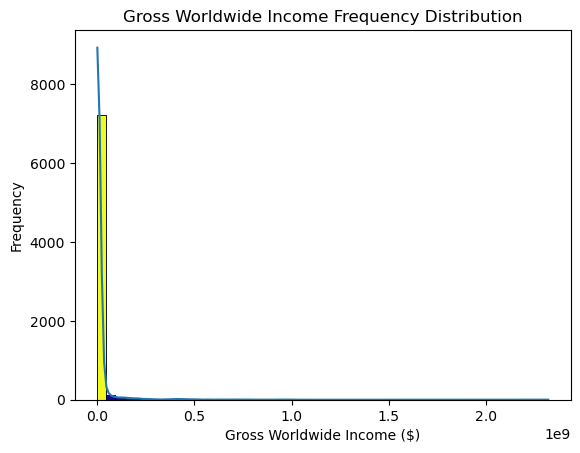

In [34]:
ax = sns.histplot(movie_dataset["grossWorldwide"], bins = 50, kde = True)

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.plasma

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Gross Worldwide Income Frequency Distribution")
plt.xlabel("Gross Worldwide Income ($)")
plt.ylabel("Frequency")

There appear to be outliers that skew the histogram, with most movies grossing less than 100k dollars. This is reinforced by the describe() function above, which shows that the median gross income is 426,000 USD, while the maximum gross income is 2.32 million. Lets try plotting the graph on a logarithmic scale and see if that fixes this issue:

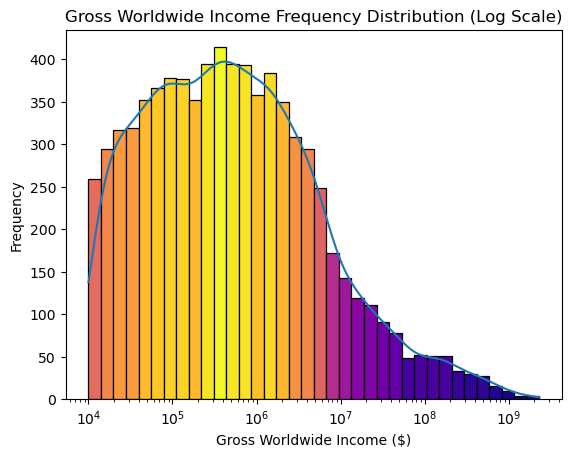

In [35]:
ax = sns.histplot(movie_dataset["grossWorldwide"], log_scale = True, kde = True)

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.plasma

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Gross Worldwide Income Frequency Distribution (Log Scale)")
plt.xlabel("Gross Worldwide Income ($)")
plt.ylabel("Frequency")

plt.show()

When plotted on a logarithmic scale, the gross worldwide income follows a negatively-skewed distribution, but this is due to removing movies that made less than 1,000 USD gross income; if they were included, the graph would follow a normal distribution.

---
**<u>Rating</u>**

Next, lets plot the averageRating column's frequency distribution:

In [36]:
movie_dataset["averageRating"].describe()

count    7588.000000
mean        6.017264
std         1.150448
min         1.000000
25%         5.400000
50%         6.100000
75%         6.800000
max         9.300000
Name: averageRating, dtype: float64

The movies have a large rating range, from 1 up to 9.3, with the median movie rating being 6.1.

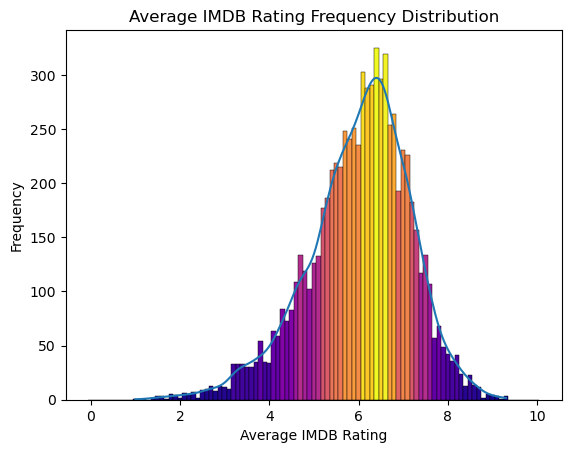

In [37]:
ax = sns.histplot(movie_dataset["averageRating"], kde = True, bins=np.arange(-0.05,10.05,0.1))

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.plasma

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Average IMDB Rating Frequency Distribution")
plt.xlabel("Average IMDB Rating")
plt.ylabel("Frequency")
plt.show()

Evidently, the average IMDB rating follows a normal distribution. This graph also showcases the newer dataset's increased variance in comparison to the original 1000 movies dataset, whose average IMDB rating range was from 7.6 to 9.3.

---
**<u>Runtime</u>**

Next lets plot the runtimeMinutes column.

In [38]:
movie_dataset["runtimeMinutes"].describe()

count    7588.000000
mean      108.093964
std        21.153210
min        40.000000
25%        93.000000
50%       103.000000
75%       119.000000
max       266.000000
Name: runtimeMinutes, dtype: float64

From observing the min, the max, and the median, it doesn't seem like a logarithmic scale will be necessary.

Text(0, 0.5, 'Frequency')

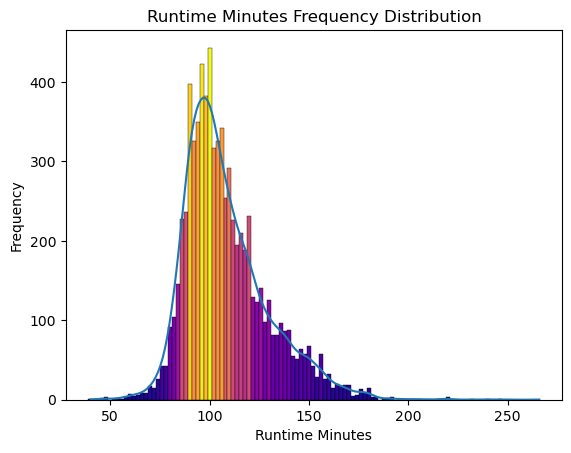

In [39]:
ax = sns.histplot(movie_dataset["runtimeMinutes"], kde = True, bins = np.arange(39, 267, 2))

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.plasma

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Runtime Minutes Frequency Distribution")
plt.xlabel("Runtime Minutes")
plt.ylabel("Frequency")
plt.show()

---
**<u>Release Year</u>**

Next lets get a feel for the amount of movies released in each year.

In [40]:
movie_dataset["startYear"].describe()

count    7588.000000
mean     2022.286769
std         1.423410
min      2020.000000
25%      2021.000000
50%      2022.000000
75%      2023.000000
max      2025.000000
Name: startYear, dtype: float64

Text(0, 0.5, 'Frequency')

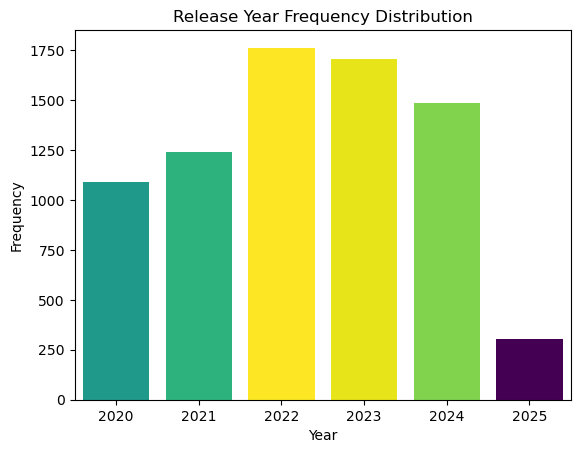

In [41]:
# Treating the year as categorical data.
ax = sns.barplot(movie_dataset["startYear"].value_counts())

patches = ax.patches

# Get the heights of the bars
counts = [patch.get_height() for patch in patches]

# Normalize counts for colormap
norm = colors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.viridis

# Apply colormap based on bar height
for count, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(count)))

plt.title("Release Year Frequency Distribution")
plt.xlabel("Year")
plt.ylabel("Frequency")

We hypothesise that the lower amount of movies released in 2020-2021 compared to 2022-2024 is due to covid-19. We're not entirely sure why 2025 has such a sizeable dip in the amount of movies released, but we have a few guesses:
- 2025 is only halfway done (which would indicate that it should have half the amount of movies released, but it appears to be ~25-30% that of the year before it).
- People require time to discover less-popular movies such as those made by indie filmmakers.
- We found some articles that suggest that there are less movies released since the start of the year (e.g. https://www.latimes.com/entertainment-arts/business/newsletter/2025-03-25/wide-shot-the-2025-box-office-is-off-to-a-horrendous-start-the-wide-shot)

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.7) Defining the Target Variable

Now that we've visualised the frequency distributions of gross income and average IMDB rating, we can define our target variable, a column that we'll call movieType (not be mistaken for titleType, the column we removed earlier which indicated if the row was a movie, TV series, etc). As a reminder, our broad classification was the following:

|     | Low Gross Income | High Gross Income |
|-----|---|---|
| **Low IMDB Rating**   | Flop | Critically-Disliked Blockbuster |
| **High IMDB Rating**   | Hidden Gem | Critically-Acclaimed Blockbuster |

In this section we'll define and try to justify our selection for the two boundaries, one between low gross income and high gross income, and the other between low IMDB rating and high IMDB rating.

Of course, in a real-world setting, these parameters could be tailored specifically for the client, as they might have different personal views as to what qualifies as a 'blockbuster', but in order to work with something we'll come up with these values ourselves.

According to many sources we've found online, 100+ million USD gross income is a typical value associated with Hollywood blockbusters. Lets see how many of our datapoints earned 100+ million USD:

In [42]:
(movie_dataset["grossWorldwide"] >= 100000000).sum()

233

Only 233 movies meet the mark. If we want to avoid class imbalances to avoid training a biased model, this is not enough as it is only ~3% of our dataset.

This leaves us with two options:
1. We strongly loosen our definition of a blockbuster, imagining it more-so as a low-budget indie blockbuster.
2. Accept the class imbalance and use model(s) that deal well with this.

---
**<u>Approach 1: Using threshold of $1,000,000</u>**

Lets examine the first option, and see how many movies have made 1+ million USD gross income:

In [43]:
len(movie_dataset[movie_dataset["grossWorldwide"] >= 1000000])

2834

Although this would degrade the status of a blockbuster, it would give us semi-balanced categories for classification, with ~37% of the data falling into the 'high gross income' bracket.

Quantifying what equates to high and low IMDB rating is much more subjective, so for this we'll just take the second quartile as the boundary point, and treating movies above that boundary as "high IMDB rating":

In [44]:
movie_dataset["averageRating"].describe()

count    7588.000000
mean        6.017264
std         1.150448
min         1.000000
25%         5.400000
50%         6.100000
75%         6.800000
max         9.300000
Name: averageRating, dtype: float64

In [45]:
len(movie_dataset[movie_dataset["averageRating"] > 6.1])

3782

Now, to finish this first approach we can count how many movies will be each category:

In [46]:
counters = {"flop": 0,"gem": 0,"disliked_blockbuster": 0,"liked_blockbuster": 0}

for _, item in movie_dataset.iterrows():
    if (item["grossWorldwide"] >= 1000000) and (item["averageRating"] > 6.1):
        counters["liked_blockbuster"] +=1
    elif( item["grossWorldwide"] >= 1000000) and (item["averageRating"] <= 6.1):
        counters["disliked_blockbuster"] +=1
    elif( item["grossWorldwide"] < 1000000) and (item["averageRating"] > 6.1):
        counters["gem"] +=1
    elif( item["grossWorldwide"] < 1000000) and (item["averageRating"] <= 6.1):
        counters["flop"] +=1

print("\033[1mAmount of movies in each category with boundaries 1M gross income and 6.1 average IMDB rating:\033[0m\n")
print(f"Amount of flops: {counters['flop']} ({counters['flop']/len(movie_dataset)*100:.2f}%)")
print(f"Amount of hidden gems: {counters['gem']} ({counters['gem']/len(movie_dataset)*100:.2f}%)")
print(f"Amount of critically-disliked blockbusters: {counters['disliked_blockbuster']} ({counters['disliked_blockbuster']/len(movie_dataset)*100:.2f}%)")
print(f"Amount of critically-acclaimed blockbusters: {counters['liked_blockbuster']} ({counters['liked_blockbuster']/len(movie_dataset)*100:.2f}%)")

Amount of movies in each category with boundaries 1M gross income and 6.1 average IMDB rating:

Amount of flops: 2541 (33.49%)
Amount of hidden gems: 2213 (29.16%)
Amount of critically-disliked blockbusters: 1265 (16.67%)
Amount of critically-acclaimed blockbusters: 1569 (20.68%)


This leads to a nice class balance, with ~37% of datapoints being classified as blockbusters.

In order to visualize how the classification will work in regards to the grossWorldwide and averageRating variables, lets make a scatterplot with a with boundaries visible, creating a grid that shows how many movies would be will be classified in each category. 

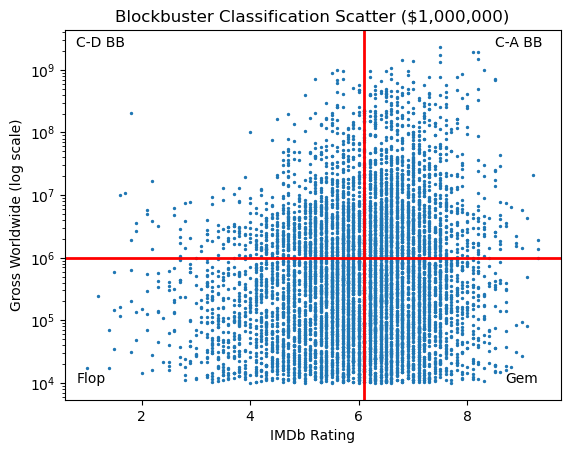

In [47]:
plt.scatter(movie_dataset["averageRating"], movie_dataset["grossWorldwide"], s=2)
plt.yscale('log')

x_center = movie_dataset["averageRating"].median()
y_center = 1000000

plt.axvline(x=x_center, color='red', linestyle='-', linewidth=2)
plt.axhline(y=y_center, color='red', linestyle='-', linewidth=2)

plt.text(0.8, 10**4, "Flop", fontsize = 10)
plt.text(8.7, 10**4, "Gem", fontsize = 10)
plt.text(0.8, 11**9, "C-D BB", fontsize = 10)
plt.text(8.5, 11**9, "C-A BB", fontsize = 10)

plt.xlabel('IMDb Rating')
plt.ylabel('Gross Worldwide (log scale)')
plt.title('Blockbuster Classification Scatter ($1,000,000)')

plt.show()

---
**<u>Approach 2: Using threshold of $100,000,000</u>**

The second approach would be to leave our gross income boundary at 100 million. For this, we keep the same average IMDB rating boundary of 6.1 (at the median). Lets see how many movies would be put in each class with these boundaries:

In [48]:
counters = {"flop": 0,"gem": 0,"disliked_blockbuster": 0,"liked_blockbuster": 0}

for _, item in movie_dataset.iterrows():
    if (item["grossWorldwide"] >= 100000000) and (item["averageRating"] > 6.1):
        counters["liked_blockbuster"] +=1
    elif( item["grossWorldwide"] >= 100000000) and (item["averageRating"] <= 6.1):
        counters["disliked_blockbuster"] +=1
    elif( item["grossWorldwide"] < 100000000) and (item["averageRating"] > 6.1):
        counters["gem"] +=1
    elif( item["grossWorldwide"] < 100000000) and (item["averageRating"] <= 6.1):
        counters["flop"] +=1

print("\033[1mAmount of movies in each category with boundaries 100M gross income and 6.1 average IMDB rating:\033[0m\n")
print(f"Amount of flops: {counters['flop']} ({counters['flop']/len(movie_dataset)*100:.2f}%)")
print(f"Amount of hidden gems: {counters['gem']} ({counters['gem']/len(movie_dataset)*100:.2f}%)")
print(f"Amount of critically-disliked blockbusters: {counters['disliked_blockbuster']} ({counters['disliked_blockbuster']/len(movie_dataset)*100:.2f}%)")
print(f"Amount of critically-acclaimed blockbusters: {counters['liked_blockbuster']} ({counters['liked_blockbuster']/len(movie_dataset)*100:.2f}%)")

Amount of movies in each category with boundaries 100M gross income and 6.1 average IMDB rating:

Amount of flops: 3742 (49.31%)
Amount of hidden gems: 3613 (47.61%)
Amount of critically-disliked blockbusters: 64 (0.84%)
Amount of critically-acclaimed blockbusters: 169 (2.23%)


This leads to a heavy class imbalance, with only ~3% of the data being classified as blockbusters. This cna significantly impact the performance of the model.

Lets make another scatterplot for visualsiation purposes:

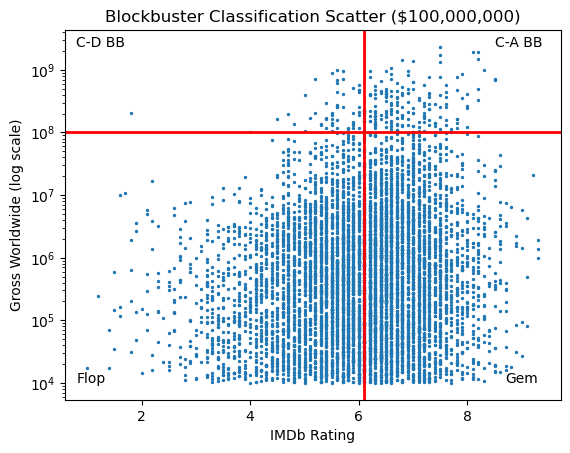

In [49]:
plt.scatter(movie_dataset["averageRating"], movie_dataset["grossWorldwide"], s=2)
plt.yscale('log')

x_center = movie_dataset["averageRating"].median()
y_center = 100000000

plt.axvline(x=x_center, color='red', linestyle='-', linewidth=2)
plt.axhline(y=y_center, color='red', linestyle='-', linewidth=2)

plt.text(0.8, 10**4, "Flop", fontsize = 10)
plt.text(8.7, 10**4, "Gem", fontsize = 10)
plt.text(0.8, 11**9, "C-D BB", fontsize = 10)
plt.text(8.5, 11**9, "C-A BB", fontsize = 10)

plt.xlabel('IMDb Rating')
plt.ylabel('Gross Worldwide (log scale)')
plt.title('Blockbuster Classification Scatter ($100,000,000)')

plt.show()

---
**<u>Final Verdict</u>**

In the end, we chose to do both options. On one hand, we have the 100M USD threshold which adheres to our original research question yet leads to a class imbalance. On the other hand we have the 1M USD threshold which will most likely lead to better model performance due to better class balance. We will keep both of these and compare them once we get to the model section.

For now, lets put them both target variables in our dataset.

In [50]:
# Creating the new columns with any random column
movie_dataset["movieType1M"] = movie_dataset["genres"]
movie_dataset["movieType100M"] = movie_dataset["genres"]

# Looping over movie_dataset's rows, and setting movieType's value based on grossWorldwide and averageRating
for index, item in movie_dataset.iterrows():
    if (item["grossWorldwide"] >= 100000000) and (item["averageRating"] > 6.1):
        movie_dataset.loc[index, "movieType100M"] = "critically_acclaimed_blockbuster"
    elif(item["grossWorldwide"] >= 100000000) and (item["averageRating"] <= 6.1):
        movie_dataset.loc[index, "movieType100M"] = "critically_disliked_blockbuster"
    elif(item["grossWorldwide"] < 100000000) and (item["averageRating"] > 6.1):
        movie_dataset.loc[index, "movieType100M"] = "hidden_gem"
    elif(item["grossWorldwide"] < 100000000) and (item["averageRating"] <= 6.1):
        movie_dataset.loc[index, "movieType100M"] = "flop"

# Looping over movie_dataset's rows, and setting movieType's value based on grossWorldwide and averageRating
for index, item in movie_dataset.iterrows():
    if (item["grossWorldwide"] >= 1000000) and (item["averageRating"] > 6.1):
        movie_dataset.loc[index, "movieType1M"] = "critically_acclaimed_blockbuster"
    elif(item["grossWorldwide"] >= 1000000) and (item["averageRating"] <= 6.1):
        movie_dataset.loc[index, "movieType1M"] = "critically_disliked_blockbuster"
    elif(item["grossWorldwide"] < 1000000) and (item["averageRating"] > 6.1):
        movie_dataset.loc[index, "movieType1M"] = "hidden_gem"
    elif(item["grossWorldwide"] < 1000000) and (item["averageRating"] <= 6.1):
        movie_dataset.loc[index, "movieType1M"] = "flop"

<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.8) Actor and Director Analysis

In this section, we analyze actor and director data to assess their suitability as features for our model. In the original dataset comprising the top 1000 IMDb movies, frequency of appearances was a strong indicator of popularity, making it a valuable parameter. However, since we have narrowed our dataset to films from the last five years, historical frequency may no longer have the same significance. This analysis explores whether actor and director presence in a film has predictive value in our more recent (past 5 years) and larger dataset.

---
**<u>Actor Frequencies**

First, we’ll check how often certain actors appear in movies from the past 5 years. Are there any big names that show up frequently?

To start, we’ll clean the data by dropping any rows with missing actor or rating information. We’ll also convert string representations of actor lists into actual Python lists, and remove any extra whitespace. Finally, we’ll print the first 10 rows of the processed actor column to confirm everything looks correct.

In [51]:
# Drop rows with missing actors or ratings
movie_dataset = movie_dataset.dropna(subset=["actors", "averageRating"])

# parse string and strip whitespace from each actor
movie_dataset['actors'] = movie_dataset['actors'].apply(lambda x: [actor.strip() for actor in ast.literal_eval(x.strip())])

print(movie_dataset['actors'].head(10))

print(movie_dataset.shape)

17            [Lewis Tan, Jessica McNamee, Josh Lawson]
18    [Dave Bautista, Dmitrij Kalacsov, Mia Rouba M....
23           [Ezra Miller, Michael Keaton, Sasha Calle]
31      [Anne Hathaway, Octavia Spencer, Stanley Tucci]
32         [Dwayne Johnson, Emily Blunt, Edgar Ramírez]
34     [Odessa A&apos;zion, Jamie Clayton, Adam Faison]
35         [Rami Malek, Rachel Brosnahan, Jon Bernthal]
37    [Alexandra Daddario, Takehiro Hira, Carice van...
38                  [Michael Peña, Maggie Q, Lucy Hale]
40    [Michael B. Jordan, Chanté Adams, Jalon Christ...
Name: actors, dtype: object
(7588, 14)


Each row in the `actors` column contains a list of three actor names, like:

`['Lewis Tan', 'Jessica McNamee', 'Josh Lawson']`

To analyze actor popularity, we need to flatten these nested lists into a single list of all actor names across the dataset. 

We'll loop through each movie's actor list, extract individual names, and collect them in a new list. After that, we'll use Python’s `Counter` from the `collections` module to count how often each actor appears.

This will give us a frequency distribution of actors, which we can use to identify the most prominent actors in movies from the past five years.


In [52]:
all_actors = []
for actor_list in movie_dataset['actors']:
    for actor in actor_list:
        all_actors.append(actor)
        
actor_count = Counter(all_actors)

print("Total actor entries:", len(all_actors))
top_actors = actor_count.most_common(40)

for actor, count in top_actors:
    print(f"{actor}: {count}")
    
print(len(all_actors))

Total actor entries: 22437
Bruce Willis: 21
Akshay Kumar: 16
Mammootty: 16
Kunchacko Boban: 15
Nicolas Cage: 15
Shine Tom Chacko: 15
Frank Grillo: 14
Grégory Gadebois: 14
Denis Podalydès: 14
Ammy Virk: 14
Asif Ali: 14
Tovino Thomas: 13
Prithviraj Sukumaran: 13
Ajay Devgn: 13
Gippy Grewal: 13
Neeru Bajwa: 13
Suraj Venjaramoodu: 13
Pierfrancesco Favino: 12
Virginie Efira: 12
Yura Borisov: 12
Johny Antony: 12
Basil Joseph: 12
Mel Gibson: 11
Amitabh Bachchan: 11
Vincent Cassel: 11
Mohanlal: 11
Karin Viard: 11
Barbara Ronchi: 11
Rashmika Mandanna: 11
Laure Calamy: 11
Isabelle Huppert: 11
Pio Marmaï: 11
Noémie Merlant: 11
Fahadh Faasil: 11
Laetitia Dosch: 10
Vincent Macaigne: 10
Franck Dubosc: 10
Vijay Sethupathi: 10
Didier Bourdon: 10
Camille Cottin: 10
22437


This list shows the 40 most frequent actors in the dataset along with their frequency counts. From this, we get a sense of which actors have been most prominent in the past 5 years. Some names may not be immediately recognizable, as the dataset is international, and actor recognition can be subjective / shaped by individual experience, taste, and cultural background.

For example, actors like **Akshay Kumar**, **Mammootty**, and **Kunchacko Boban** are popular figures in Indian cinema. Their presence in the top list suggests that our dataset includes a substantial number of Indian films. Similarly, actors such as **Virginie Efira**, **Yura Borisov**, and **Pierfrancesco Favino** appear frequently and are well-known in European cinema. This highlights the dataset’s diverse and international nature, so it’s not limited to English-language or Hollywood films.

---
**<u>Actor Frequency Distribution**


In [2]:
frequencies = list(actor_count.values())

plt.figure(figsize=(8, 4))

sns.histplot(frequencies, bins=range(1, max(frequencies)+1), kde=False)   

plt.yscale("log")  
plt.title("Distribution of Actor Frequencies (Log Scale)")
plt.xlabel("Number of Movies Appeared In")
plt.ylabel("Number of Actors (Log Scale)")
plt.tight_layout()
plt.show()

NameError: name 'actor_count' is not defined

The distribution shows that most actors appear only a few times in the dataset. To get a clearer picture of which names dominate, we can plot the 20 most frequently occurring actors. This analysis is relevant because high-frequency actors might reflect who was most in-demand or prolific during the chosen time period. Popular actors may also influence trends in ratings or box office gross. In addition, we might uncover creative networks in the dataset, for example, frequently cast actors who tend to work with the same directors, production teams, or within specific genres.


**<u>Top 20 Most Frequent Actors</u>**

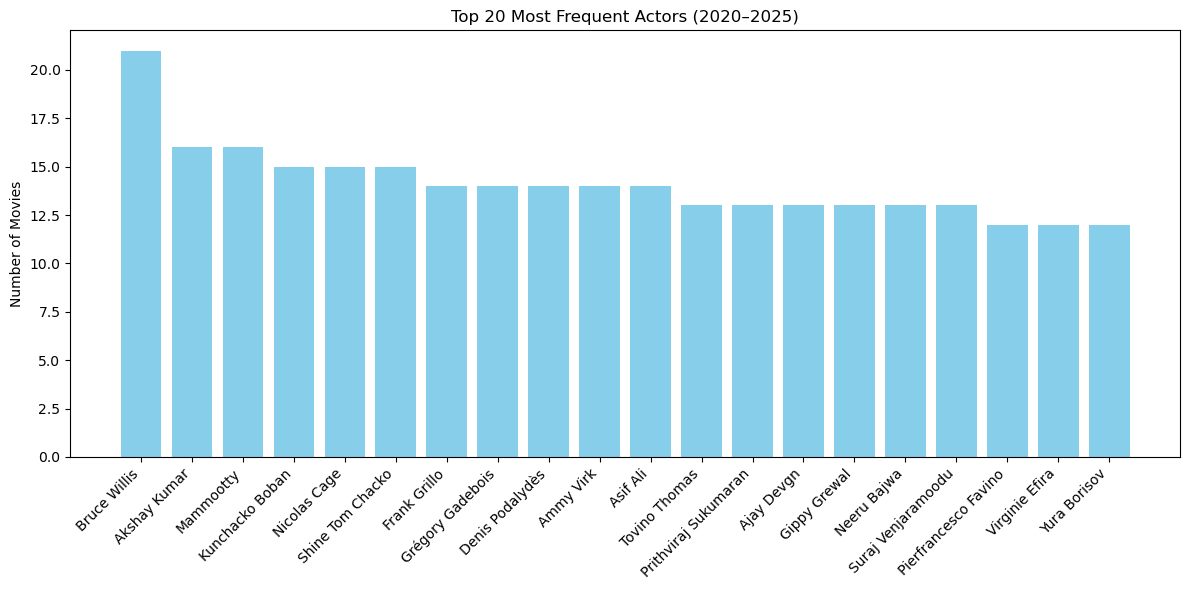

In [83]:
top_20 = actor_count.most_common(20)
actors = [actor for actor, count in top_20]
movie_count = [count for actor, count in top_20]

plt.figure(figsize=(12, 6))
plt.bar(actors, movie_count, color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Movies")
plt.title("Top 20 Most Frequent Actors (2020–2025)")
plt.tight_layout()
plt.show()

---
**<u>Comparing Actor Frequency and Ratings**

While frequency tells us which actors appear most often in the dataset, it doesn’t necessarily reflect their impact or popularity. An actor may be featured in many films, but if those films receive low ratings, their frequent appearances might not indicate audience approval.

To add more context, we’ll calculate the average IMDb rating for each of the top 40 most frequent actors. This allows us to identify actors who are not only prolific but also consistently associated with higher-quality films. In other words, we’re exploring whether frequency aligns with film success and which actors may have a stronger influence on positive ratings.

This analysis builds on the previous frequency-based list by adding a qualitative dimension through average ratings.


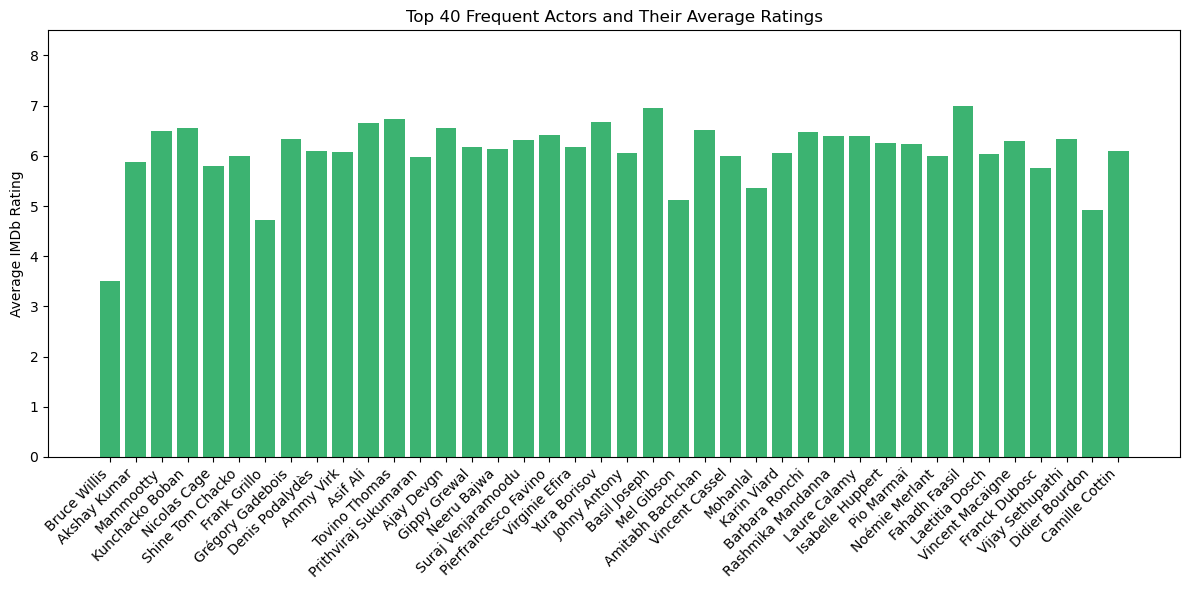

In [82]:
# Top 40 actors (based on appearance frequency)
top_actors = [actor for actor, _ in actor_count.most_common(40)]
avg_ratings = []

cast_rating_data = list(zip(movie_dataset["actors"], movie_dataset["averageRating"]))

for actor in top_actors: # Collecting ratings from all movies this actor appears in
    ratings = [rating for cast, rating in cast_rating_data if actor in cast]
    avg_rating = sum(ratings) / len(ratings)
    avg_ratings.append(avg_rating)

plt.figure(figsize=(12, 6))
plt.bar(top_actors, avg_ratings, color="mediumseagreen")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average IMDb Rating")
plt.title("Top 40 Frequent Actors and Their Average Ratings")
plt.ylim(0, 8.5)  # rating range
plt.tight_layout()
plt.show() 

The bar chart above shows the top 40 most frequently appearing actors in our dataset, along with the average IMDb ratings of the movies they’ve been in (between 2020 and 2025).

A few key observations:

- **There’s a wide range of average ratings**, from below 4.0 to nearly 7.0, suggesting that high frequency does not always correlate with high-rated films.
- **Bruce Willis**, despite being the most frequent actor, has a relatively low average rating, possibly due to many low-budget or direct-to-streaming releases during this period.
- On the other hand, actors like **Virginie Efira**, **Pierfrancesco Favino**, and **Fahadh Faasil** show both high frequency and strong average ratings, suggesting consistent quality in the projects they appear in.
- The presence of **many Indian and European actors** continues to highlight the international nature of the dataset, as mentioned earlier.
- These variations hint at potential patterns worth exploring further such as links between certain actors, directors, and genres, or how actor consistency relates to commercial or critical success.

This plot helps us start thinking about which actors might positively or negatively impact a model that predicts rating or box office performance.


---
**<u>All Actor Frequencies vs. Average Ratings (Full Distribution)**

So far, we’ve focused only on the **top 40 most frequent actors**, but that offers a limited view. To get a more complete picture, we now analyze **all actors** who appear in more than one movie in the dataset.

For each actor, we calculate:
- **Frequency** (how many movies they appeared in)
- **Average IMDb rating** of those movies

We then plot these as a scatter plot, where each point represents an actor. The **color of each point** indicates how often the actor appears (frequency), and the **y-axis** shows their average rating.

This visualization helps us explore:
- Whether there’s a general relationship between actor frequency and movie quality
- If high-frequency actors tend to appear in higher- or lower-rated films
- How much variation exists among less frequent actors

It also gives us a broader sense of the distribution of actor performance across the dataset, beyond just the most prominent names.

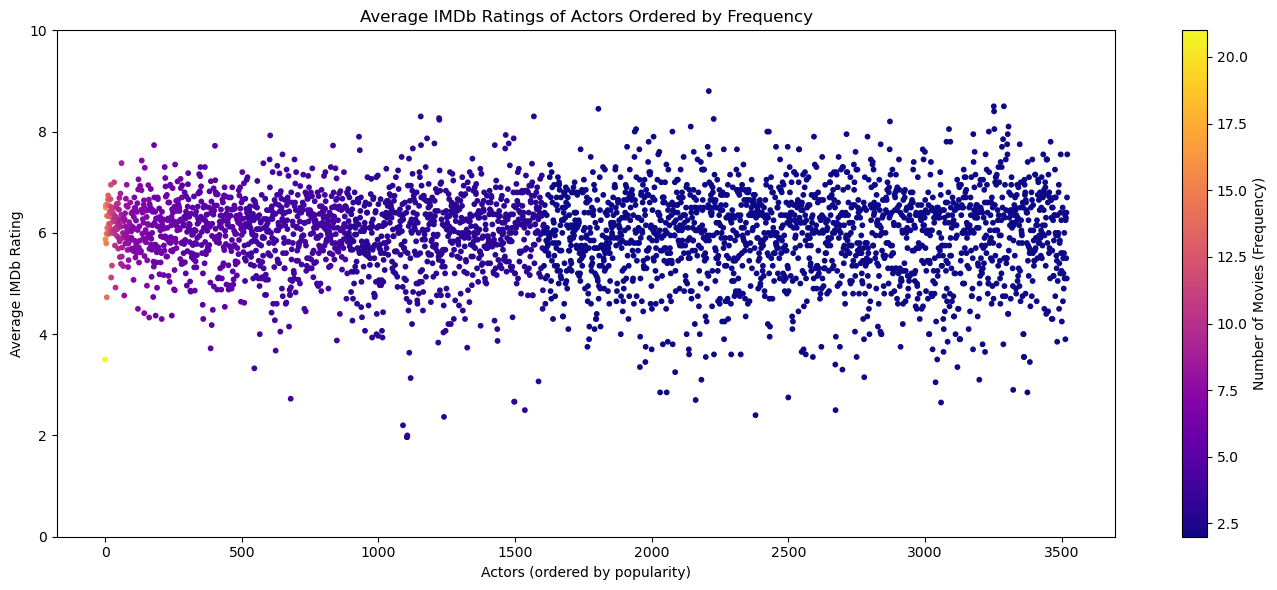

In [56]:
# All actor rating pairs
actor_ratings = defaultdict(list)

for cast, rating in zip(movie_dataset["actors"], movie_dataset["averageRating"]):
    for actor in cast:
        actor_ratings[actor].append(rating)

# Compute frequency and average rating for each actor
actor_stats = {
    actor: {
        "frequency": len(ratings),
        "avg_rating": sum(ratings) / len(ratings)
    }
    for actor, ratings in actor_ratings.items()
    if len(ratings) > 1  #filter to actors with >1 movie
}

# Sort actors by descending frequency 
sorted_actors = sorted(actor_stats.items(), key=lambda x: x[1]["frequency"], reverse=True)

# Extract data for plotting
actors = [actor for actor, _ in sorted_actors]
frequencies = [stats["frequency"] for _, stats in sorted_actors]
avg_ratings = [stats["avg_rating"] for _, stats in sorted_actors]

plt.figure(figsize=(14, 6))
plt.scatter(range(len(avg_ratings)), avg_ratings, c=frequencies, cmap="plasma", s=10)
plt.colorbar(label="Number of Movies (Frequency)")
plt.ylabel("Average IMDb Rating")
plt.xlabel("Actors (ordered by popularity)")
plt.title("Average IMDb Ratings of Actors Ordered by Frequency")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

This scatter plot shows the average IMDb ratings for all actors (who appeared in more than one movie), ordered by how frequently they appear in the dataset. Each point represents an actor, and the color indicates the number of movies they've appeared in.

Key Observations:

- **High variation at low frequency**: On the left side of the plot, where actors have fewer appearances, there's a wider spread in average ratings—ranging from very low to very high. This makes sense, as a single movie (or just a few) can strongly influence an actor's average rating.

- **Ratings stabilize with frequency**: As we move to the right (actors with more appearances), the variation in average ratings narrows and converges toward the 5.5–7.0 range. This suggests that for more prolific actors, the effect of outlier films diminishes, and their average rating becomes more stable.

- **No clear correlation between frequency and rating**: There isn’t a strong trend indicating that more frequent actors are consistently rated higher or lower. Some actors with high frequency (bright yellow points on the left) still have relatively low average ratings, while others perform better.

**Potential modeling implication**: Frequency alone may not be a strong predictor of movie quality (as measured by rating), but combining it with other features—like genre or director—could reveal more useful patterns.

This plot complements our earlier analysis by showing the full distribution of actors, not just the top 40, and helps confirm that frequency is not a reliable stand-alone indicator of film quality.

---
**<u>Retrieving Movies by Actor**

The following function allows us to retrieve a list of all movies that a given actor has appeared in, based on the dataset. This is useful for manually inspecting specific actors and validating their average rating or frequency.

In the example below, we use the function to display all movies featuring **Bruce Willis**. This can help explain why certain actors have high or low average ratings, and provide context for outlier values in our earlier visualizations.

The following function allows us to access a list of movies a single actor (input) has stared in. This can be used for checking individual values. 

In [57]:
def get_movies_by_actor(movie_dataset, actor_name):
    return movie_dataset[movie_dataset['actors'].apply(lambda cast: actor_name in cast)]['primaryTitle'].tolist()

movies = get_movies_by_actor(movie_dataset, "Bruce Willis")
for title in movies:
    print("-", title)

- Survive the Night
- Hard Kill
- Midnight in the Switchgrass
- Cosmic Sin
- Out of Death
- Survive the Game
- Apex
- American Siege
- Gasoline Alley
- A Day to Die
- Assassin
- Fortress
- Fortress: Sniper's Eye
- Paradise City
- White Elephant
- Vendetta
- Wrong Place
- Detective Knight: Rogue
- Detective Knight: Redemption
- Detective Knight: Independence
- Breach


---
**<u>Actor Frequency and Average IMDb Rating</u>**

In this section, we take a closer look at the relationship between how frequently an actor appears in movies and the average IMDb ratings of those films. Each point in the scatter plot below represents one actor. The x-axis shows the number of movies they've appeared in, while the y-axis shows the average rating of those movies. This visualization allows us to explore whether actors who appear in more films tend to be associated with better (or worse) rated content.

To quantify the strength and nature of this relationship, we compute two correlation coefficients: Pearson correlation, which captures linear relationships, and Spearman correlation, which captures trends that go consistently up or down, even if not linear. These metrics help us determine if there's any meaningful trend between actor frequency and average film rating across the dataset.

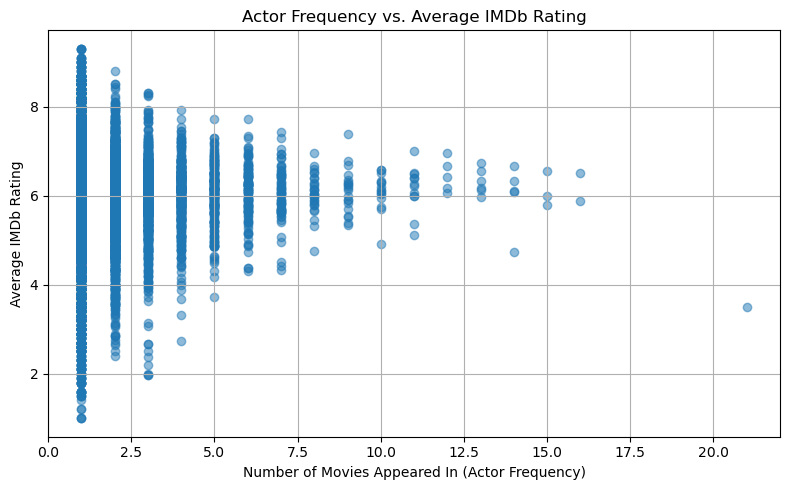

Pearson correlation: -0.003 (p = 0.708)
Spearman correlation: -0.045 (p = 2.23e-08)


In [58]:
# Dictionary to collect all ratings per actor
actor_ratings = defaultdict(list)

for cast, rating in cast_rating_data:
    for actor in cast:
        actor_ratings[actor].append(rating)

# Frequency and average rating per actor
actor_freq_vs_rating = [
    (len(ratings), sum(ratings) / len(ratings))
    for actor, ratings in actor_ratings.items()
]

frequencies, avg_ratings = zip(*actor_freq_vs_rating)

plt.figure(figsize=(8, 5))
plt.scatter(frequencies, avg_ratings, alpha=0.5)
plt.title("Actor Frequency vs. Average IMDb Rating")
plt.xlabel("Number of Movies Appeared In (Actor Frequency)")
plt.ylabel("Average IMDb Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

#Some tests:
pearson_corr, pearson_p = pearsonr(frequencies, avg_ratings)
spearman_corr, spearman_p = spearmanr(frequencies, avg_ratings)

print(f"Pearson correlation: {pearson_corr:.3f} (p = {pearson_p:.3g})")
print(f"Spearman correlation: {spearman_corr:.3f} (p = {spearman_p:.3g})")

Key Takeaways:
No meaningful linear correlation. The Pearson correlation coefficient is **-0.003** with a high p-value (**p = 0.708**), indicating no significant linear relationship between actor frequency and movie rating.
The Spearman correlation is **-0.045** with a very small p-value (**p ≈ 2.2e-08**). This suggests a very weak but statistically significant *negative* monotonic trend. The scatter plot supports this. Most average ratings fall between **5.0 and 7.5**, regardless of frequency, and there is no clear upward or downward trend.

Thus, actor frequency is not a reliable predictor of a film's average IMDb rating on its own. While prolific actors may appear more often, this does not translate into significantly higher rated films in general.

---
**<u>Actor Frequency and Average Gross Income</u>**

Next, we shift our focus to **gross income**. It's possible that while frequent actors don't necessarily appear in higher-rated movies, they may still be commercially successful. By examining gross revenue data, we can explore whether frequently cast actors tend to be associated with higher box office performance.

For each actor (with at least two movie appearances), we calculate Frequency and Average Gross Income (Mean worldwide gross revenue across those films). We then plot actor frequency against average gross to see if a pattern emerges. While rating reflects critical and audience reception, gross income gives us insight into commercial success, which may or may not align with frequency.

In [3]:
cast_gross_data = list(zip(movie_dataset["actors"], movie_dataset["grossWorldwide"]))

# Collect all gross values per actor
actor_grosses = defaultdict(list)

for cast, gross in cast_gross_data:
    for actor in cast:
        actor_grosses[actor].append(gross)

# Actor frequency and average gross
actor_freq_vs_gross = [
    (len(grosses), sum(grosses) / len(grosses))
    for actor, grosses in actor_grosses.items()
    if len(grosses) >= 2  # optional: filter out actors with only 1 movie
]


frequencies, avg_grosses = zip(*actor_freq_vs_gross)

plt.figure(figsize=(8, 5))
plt.scatter(frequencies, avg_grosses, alpha=0.5)
plt.title("Actor Frequency vs. Average Gross Worldwide")
plt.xlabel("Number of Movies Appeared In (Actor Frequency)")
plt.ylabel("Average Gross (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'movie_dataset' is not defined

---
**<u>`compute_score` Function</u>**

The `compute_score` function is designed to compute a combined performance metric for a given set of entities—such as actors, directors, or movies—based on their associated values (e.g., ratings or gross income). It balances two important aspects: **Efficiency** = The average value (mean rating or gross), and **Consistency** = How stable or reliable the actor/director's performance is across entries

Why this is useful:
Actors/Directors with high average values but highly inconsistent outcomes (one great movie and several bad ones) may not be as desirable as those with consistently solid performance + The function ensures that both performance and reliability are taken into account, avoiding bias toward outliers.

Key Parameters:
- `data`: A list of tuples containing (entity, value[, weight]). Example: `("Actor Name", rating, weight)`
- `min_std`: Minimum standard deviation threshold to avoid inflating the consistency score due to extremely low variance.
- `weighted`: If `True`, values are averaged using weights (box office revenue as weight); otherwise, a simple average is used.

it returns:
A dictionary mapping each entity to a final **score** computed as: score = 0.5 * efficiency + 0.5 * consistency

Where:
- **Efficiency** = average value (weighted or unweighted)
- **Consistency** = efficiency divided by the standard deviation of values (if std ≥ min_std)

This score can be used to rank entities not just by how well they perform, but how reliably they do so.


In [60]:
def compute_score(data, min_std=0.5, weighted=False):
    """
    data: list of (entity, value[, weight])
    weighted: if True, use weighted average; else unweighted average
    """
    value_sum = defaultdict(float)
    weight_sum = defaultdict(float)
    value_list = defaultdict(list)
    count = defaultdict(int)

    for item in data:
        entity = item[0]
        value = item[1]
        weight = item[2] if weighted and len(item) > 2 else 1

        value_sum[entity] += value * weight
        weight_sum[entity] += weight
        value_list[entity].append(value)
        count[entity] += 1

    # Efficiency: weighted or unweighted average
    efficiency = {
        e: value_sum[e] / weight_sum[e]
        for e in value_sum
        if weight_sum[e] > 0
    }

    # Consistency: efficiency / std
    consistency = {
        e: efficiency[e] / std
        if len(value_list[e]) > 1 and (std := np.std(value_list[e])) >= min_std
        else 0
        for e in efficiency
    }

    # Final score
    score = {
        e: 0.5 * efficiency[e] + 0.5 * consistency.get(e, 0)
        for e in efficiency
    }

    return score

---
**<u>Ranking Actors by Rating Efficiency and Consistency</u>**

In this section, we use the previously defined `compute_score` function to rank actors based on both how well and how consistently their films are rated.

We start with a dataset containing each actor, the IMDb rating of the movie they appeared in, and the number of votes that rating received. The list is flattened so that each entry corresponds to a single actor–movie pair. We then compute a combined score for each actor using the `compute_score` function:
  - **Efficiency** is the actor’s weighted average rating across all their movies.
  - **Consistency** reflects how stable their ratings are (low variance = high consistency).
  - **Weights** are based on the number of votes, so ratings from widely reviewed movies carry more influence.
- Finally, we sort actors by their final score and plot the **top 20**.

This visualization highlights actors who not only perform well on average but also do so reliably, avoiding one-hit wonders and inconsistent performers.

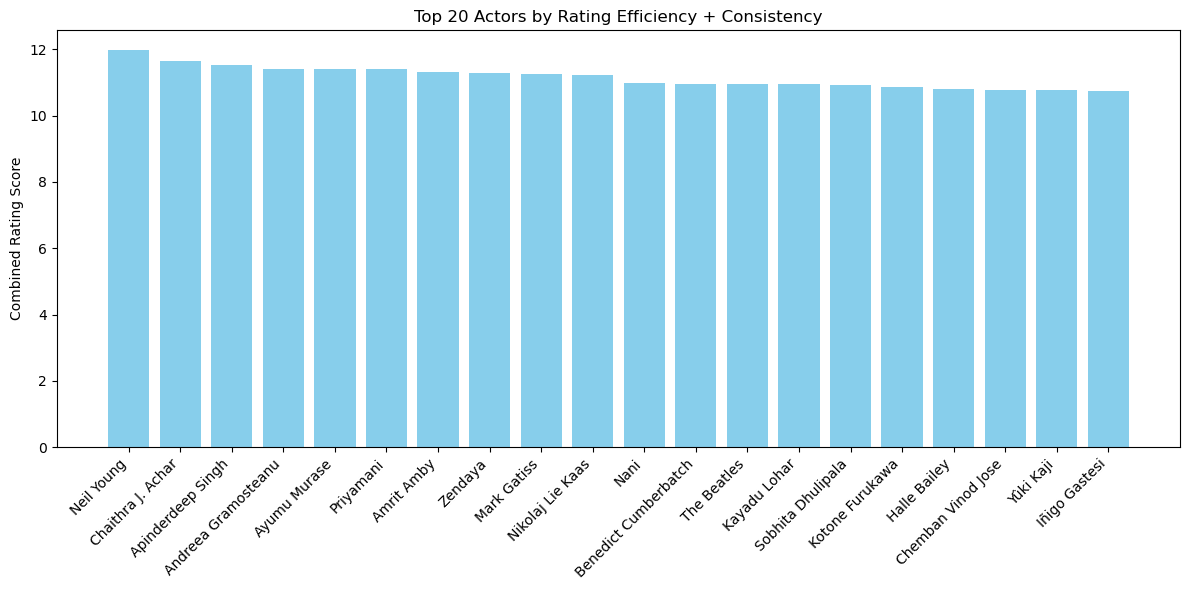

In [81]:
cast_rating_votes_data = list(zip(movie_dataset["actors"], movie_dataset["averageRating"], movie_dataset["numVotes"]))

flat_cast_rating_votes_data = [
    (actor, rating, votes)
    for cast, rating, votes in cast_rating_votes_data
    for actor in cast
]

# Compute score 
rating_score = compute_score(
    flat_cast_rating_votes_data,
    min_std=0.5,
    weighted=True
)

# Plot top 20
top_rating_actors = sorted(rating_score.items(), key=lambda x: x[1], reverse=True)[:20]
actors, scores = zip(*top_rating_actors)

plt.figure(figsize=(12, 6))
plt.bar(actors, scores, color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Combined Rating Score")
plt.title("Top 20 Actors by Rating Efficiency + Consistency")
plt.tight_layout()
plt.show()

The bar chart above presents the top 20 actors based on a combined metric that considers both efficiency and consistency.

Key Observations:
- The list includes a diverse mix of well-known names (e.g. *Zendaya*, *Benedict Cumberbatch*, *The Beatles*) as well as lesser-known or international actors (e.g. *Chaitra J. Achar*, *Ayumu Murase*, *Kayadu Lohar*). This diversity further reflects the international nature of the dataset, as discussed in earlier sections.

- Actors like *Neil Young* and *Priyamani* rank highly, which may be driven by a small set of consistently well-rated films with strong audience support (high vote counts and low rating variance).

- Because this score favors **consistency alongside strong performance**, it avoids overvaluing actors who had one or two standout hits but inconsistent careers overall.

This type of scoring is more **robust and fair** than simply using average rating or frequency alone. It highlights actors who reliably contribute to well-received films, making it a useful tool for downstream modeling or recommendation systems.


---

**<u>Top 20 Actors by Gross Efficiency + Consistency</u>**

In this section, we apply the same scoring approach used for IMDb ratings -> efficiency + consistency, but now using **gross worldwide income** as the target metric.

We flatten the dataset so that each entry links an **actor** to the **gross income** of a film they appeared in. Using the `compute_score` function, we calculate a combined score that reflects Efficiency = the average gross income of the actor’s films and Consistency = how stable those grosses are across films (low variance = higher consistency). We also set a minimum standard deviation threshold of $100,000 to avoid overinflating scores for actors with extremely low variability in small box office results. Finally, the top 20 actors with the highest combined gross scores are plotted.


This metric surfaces actors who are not only associated with high-grossing films, but who consistently contribute to commercial success (just like we did for ratings). Unlike raw averages, this score penalizes volatility and rewards sustained performance, offering a more balanced view of box office reliability. This provides valuable insight for financial modeling or casting strategies focused on revenue potential.


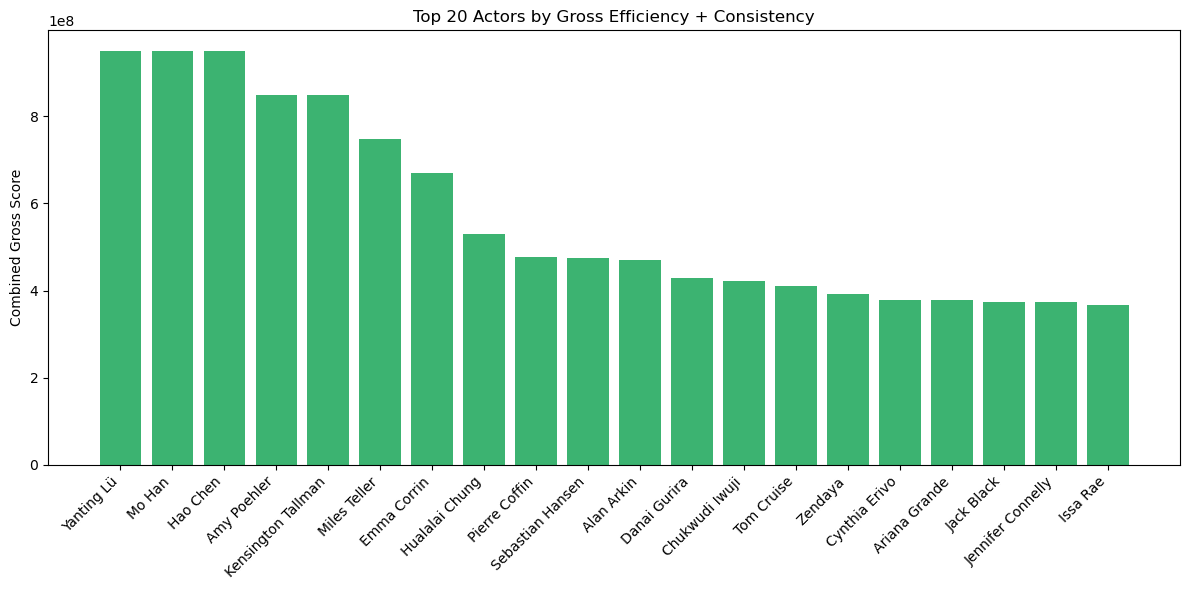

In [80]:
flat_cast_gross_data = [
    (actor, gross)
    for cast, gross in zip(movie_dataset["actors"], movie_dataset["grossWorldwide"])
    for actor in cast
] 
# score for gross
gross_score = compute_score(
    flat_cast_gross_data,
    min_std=1e5,  # only consider std if above $100K
    weighted=False
)

# Top 20 actors
top_gross_actors = sorted(gross_score.items(), key=lambda x: x[1], reverse=True)[:20]
actors, scores = zip(*top_gross_actors)

plt.figure(figsize=(12, 6))
plt.bar(actors, scores, color="mediumseagreen")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Combined Gross Score")
plt.title("Top 20 Actors by Gross Efficiency + Consistency")
plt.tight_layout()
plt.show()

Key Observations:
- Yating Lü, Mo Han, and Hao Chen top the list with extremely high combined gross scores, suggesting they appear in a small number of very commercially successful films with consistent performance.
- Several well-known names appear as well, including Tom Cruise, Zendaya, Ariana Grande, Jennifer Connelly, and Jack Black, which aligns with their presence in high-grossing blockbusters.
- Some lesser-known actors also rank highly, possibly due to their association with major animated or franchise films that perform consistently well at the box office.
- The inclusion of both familiar and unfamiliar names again reflects the international and diverse nature of the dataset.

This metric doesn’t just reward one-off box office hits. It highlights actors who are consistently involved in financially successful projects, making them particularly interesting from a business or casting perspective. Comparing this chart with the earlier rating-based ranking also reveals which actors make a balance between critical acclaim and commercial performance, and which ones excel in just one area.

---

**<u>Exploring Actor Pairs: Collaborations and Their Impact</u>**

Individual actor performance gives valuable insight, but movies are collaborative efforts, so analyzing **actor pairs** can reveal patterns in successful partnerships.

For each movie, we generate all possible actor pairs from the cast. We track how often each pair appears together, and collect both the **IMDb ratings** and **gross revenues** of the films they co-star in. We then filter for repeat pairs (those who have appeared together in at least 2 films) to ensure meaningful statistics. For each repeat pair, we compute: Average IMDb rating and Average gross revenue.

Finally, we sort and visualize the top 30 actor pairs by:
- **Average IMDb rating** – to identify the most critically successful collaborations.
- **Average gross revenue** – to highlight financially successful duos.

This is useful because some actor pairs may bring out the best in each other creatively, leading to high ratings, while others may have strong box office chemistry and attract large audiences. Overall these insights can inform casting decisions, collaborative modeling, and trend discovery across genres or regions. This approach also may uncover network dynamics in the dataset, beyond individual statistics into co-performance patterns.

**Actor pairs and IMDB rating**

In [ ]:
pair_stats = defaultdict(lambda: {"count": 0, "ratings": [], "grosses": []})

for i, (cast, rating) in enumerate(cast_rating_data):
    gross = movie_dataset.iloc[i]["grossWorldwide"]
    for pair in combinations(cast, 2): 
        key = tuple(sorted(pair))
        pair_stats[key]["count"] += 1
        pair_stats[key]["ratings"].append(rating)
        pair_stats[key]["grosses"].append(gross)

        # Filter for repeat actor pairs
repeat_pairs = {
    pair: stats
    for pair, stats in pair_stats.items()
    if stats["count"] >= 2
}
# Computing averages
for stats in repeat_pairs.values():
    stats["avg_rating"] = sum(stats["ratings"]) / len(stats["ratings"])
    stats["avg_gross"] = sum(stats["grosses"]) / len(stats["grosses"])


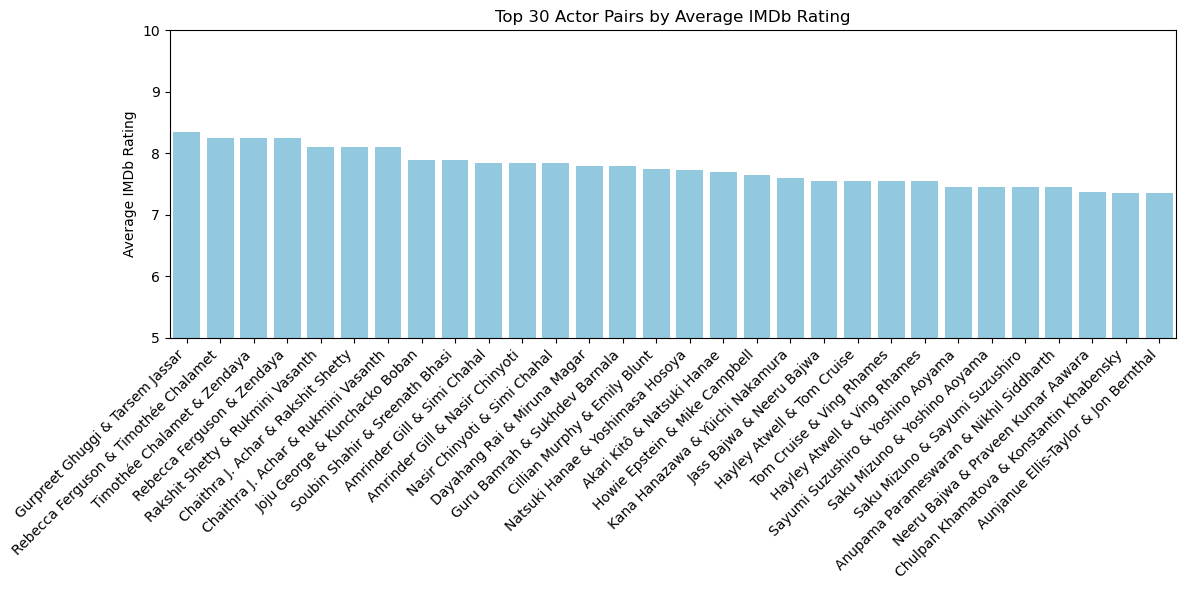

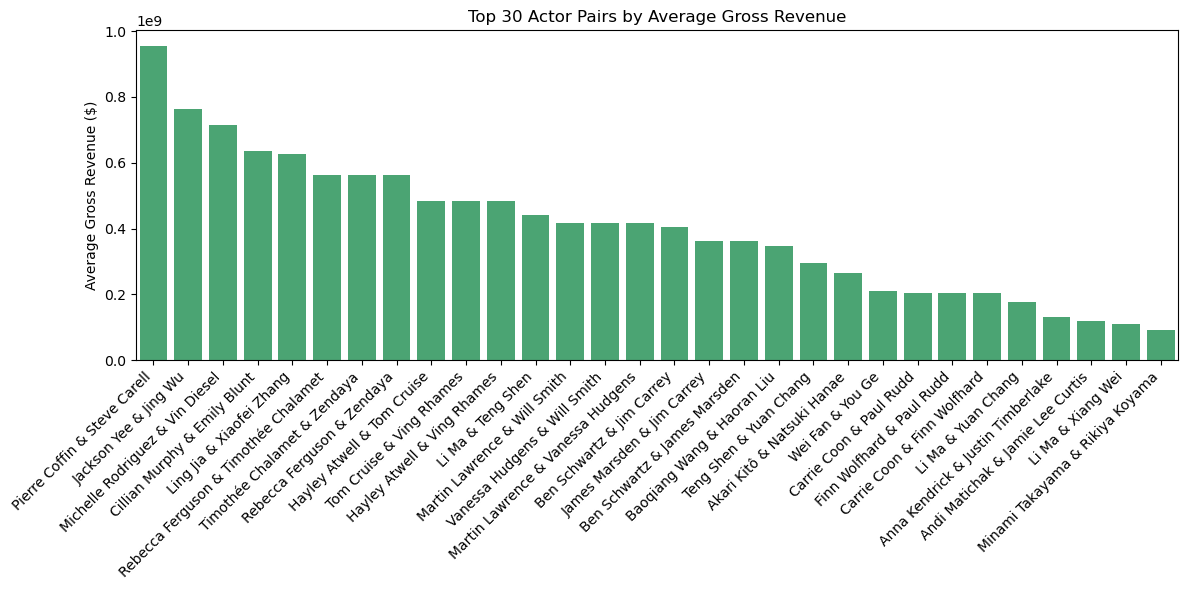

In [63]:
# By Rating
top_pairs_by_rating = sorted(repeat_pairs.items(), key=lambda x: x[1]["avg_rating"], reverse=True)[:30]
pair_labels_rating = [f"{a} & {b}" for (a, b), _ in top_pairs_by_rating]
avg_ratings = [stats["avg_rating"] for _, stats in top_pairs_by_rating]

plt.figure(figsize=(12, 6))
sns.barplot(x=pair_labels_rating, y=avg_ratings, color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average IMDb Rating")
plt.ylim(5, 10)
plt.title("Top 30 Actor Pairs by Average IMDb Rating")
plt.tight_layout()
plt.show()

This chart highlights the top 30 actor pairs who have appeared together in multiple films, ranked by the **average IMDb rating** of those shared projects.

Key Observations: Gurpreet Ghuggi & Tarsem Jassar and Rebecca Ferguson & Timothee Chalamet lead the list, suggesting strong critical reception when these duos appear together. Zendaya appears in multiple top-rated pairs (like with Timothee Chalamet and Rebecca Ferguson), reflecting her involvement in well-received films with consistent co-stars.

Many of the highest-ranking pairs come from regional or international cinema, such as South Indian or Japanese films, and several recurring names suggest that certain actor partnerships consistently produce critically successful films, which could be due to strong chemistry, repeated collaborations with specific directors, or genre alignment.

These high-ranking pairs represent creative partnerships that tend to produce quality work. This kind of analysis adds nuance beyond individual scores, helping identify effective actor dynamics that could be useful in predictive models or casting decisions.

**Actor pairs and Gross Worldwide**

In [ ]:
# By Gross
top_pairs_by_gross = sorted(repeat_pairs.items(), key=lambda x: x[1]["avg_gross"], reverse=True)[:30]
pair_labels_gross = [f"{a} & {b}" for (a, b), _ in top_pairs_by_gross]
avg_grosses = [stats["avg_gross"] for _, stats in top_pairs_by_gross]

plt.figure(figsize=(12, 6))
sns.barplot(x=pair_labels_gross, y=avg_grosses, color="mediumseagreen")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Gross Revenue ($)")
plt.title("Top 30 Actor Pairs by Average Gross Revenue")
plt.tight_layout()
plt.show()

This chart ranks the top 30 actor pairs based on the **average worldwide gross** of the films they have appeared in together (minimum two shared appearances).

Key Observations: Pierre Coffin & Steve Carell dominate the list, with an average gross approaching $1 billion. Other high-ranking pairs include Jackson Yee & Jing Wu, prominent in high-budget Chinese cinema, Michelle Rodriguez & Vin Diesel, known for the *Fast & Furious* franchise, Cillian Murphy & Emily Blunt, likely from *Oppenheimer* and other collaborations.

The list features a mix of Hollywood blockbuster stars, animated film voices, and international film figures, showing the diverse commercial drivers across global cinema.

These actor pairs consistently drive **box office success**, making them key assets in high-grossing productions. This insight is particularly valuable for casting decisions, marketing strategies, & Predictive modeling of commercial performance. It also highlights how some actors may not stand out individually but form highly bankable duos when paired together.

### **<u>Conclusion: Actor Analysis and Its Value for Modeling</u>**

This actor-focused investigation has revealed several important insights that are valuable for building predictive models, especially in the context of IMDb ratings and box office performance:

- **Frequency alone is not predictive**: We found that an actor’s frequency of appearance has minimal correlation with average IMDb ratings or gross income. This shows that raw appearance count is not a reliable standalone feature.
  
- **Rating and gross performance vary widely across individuals**: By combining **efficiency** (average performance) and **consistency** (low variance), we were able to rank actors and identify those who not only perform well but do so reliably across multiple projects. These scores can serve as **numerical actor quality indicators** in modeling.

- **Actor pairs reveal hidden synergies**: Repeated collaborations between actors can be highly predictive of both critical and commercial success. Actor-pair scores may capture **relational or network effects** that are missed by individual-level features.

- **Actors as proxies for missing data**: Since the dataset does **not include production budgets**, the presence of **famous or high-scoring actors** may act as a **proxy indicator for a film's budget or production value**. Well-known actors are typically more expensive to cast and often appear in high-investment projects. Including actor-based scores or frequency of top-tier names could help **indirectly account for production scale** in downstream models.

**Implication for Modeling**

The insights gained here can directly inform feature engineering for predictive models. For example actor-level scores (rating-based, gross-based), actor-pair effectiveness, frequency of A-list actors (as a budget signal) & categorical or embedded representations of actors or casting patterns

In summary, actor-related variables—when thoughtfully constructed—can enrich the feature space and help models capture patterns tied to both film **quality** and **commercial success**, even when key data like budget is unavailable.


---
### **<u>Director Frequencies</u>**

After analyzing actors and actor pairs, we now turn our attention to **directors**, another key creative force behind a film's success.

Just like we did with actors, we’ll start by examining how often each director appears in the dataset. High-frequency directors may be more active, more in-demand, or associated with certain genres or production styles. While frequency alone may not reflect quality, it can give us a first impression of which directors are most represented in our dataset. This will set the stage for further analysis, including how a director’s frequency relates to IMDb ratings and gross income—similar to our approach with actors.

By exploring directors, we aim to identify:
- Which directors are the most prolific in recent years
- Whether consistent collaboration with certain actors or genres is associated with better outcomes
- How director presence may serve as a meaningful feature in our predictive models

---
**<u>Director Frequency Overview</u>**


In [64]:
movie_dataset = movie_dataset.dropna(subset=["director", "averageRating", "grossWorldwide"])

director_rating_data = list(zip(movie_dataset["director"], movie_dataset["averageRating"]))

print("Sample (Director, Rating):")
print(director_rating_data[:5])

def count_director_frequency(data):
    director_list = [director for director, _ in data]
    director_count = Counter(director_list)

    print("\nTop 20 Director Appearance Frequencies:\n")
    for director, count in director_count.most_common(20):
        print(f"{director}: {count}")
    
    return director_count

director_count = count_director_frequency(director_rating_data)

Sample (Director, Rating):
[('Simon McQuoid', 6.1), ('J.J. Perry', 5.8), ('Andy Muschietti', 6.6), ('Robert Zemeckis', 5.4), ('Jaume Collet-Serra', 6.6)]

Top 20 Director Appearance Frequencies:

Hong Sang-soo: 9
Patryk Vega: 7
Edward Drake: 7
Herman Yau: 7
Castille Landon: 6
Quentin Dupieux: 6
Johan Nijenhuis: 6
Haruo Sotozaki: 6
Smeep Kang: 6
Michihito Fujii: 6
Uday Pratap Singh: 6
Hideo Nakata: 5
Takahiro Miki: 5
François Ozon: 5
Selçuk Aydemir: 5
Jesse V. Johnson: 5
Jagdeep Sidhu: 5
Tsutomu Hanabusa: 5
Sailesh Kolanu: 5
Santiago Segura: 5


The sample of (director, rating) pairs shows a range of critical reception—from well-known directors like Robert Zemeckis (5.4) to newer names like Simon McQuoid (6.1) and J.J. Perry (5.8). Ratings vary, highlighting that name recognition doesn’t always guarantee high ratings. The top 20 most frequent directors include Hong Sang-soo (9 films) and a mix of international filmmakers such as Patryk Vega, Edward Drake, and François Ozon, suggesting a diverse and globally representative dataset.

This frequency snapshot helps us identify prolific directors and sets the stage for exploring how often they appear relative to the quality and success of their films.

---
**<u>Distributions of Director Ratings and Gross Income</u>**

To better understand overall director performance, we compute the **average IMDb rating** and **average worldwide gross** for each director.

- The first plot shows the distribution of average ratings across all directors. This gives a sense of how consistent or varied critical reception is in the dataset.
- The second plot shows the distribution of average gross revenue, using a log scale to handle the wide range of values. This helps us see patterns more clearly across low- and high-earning directors.

These distributions help identify whether most directors cluster around a certain performance level, and highlight outliers who may have strong or weak influence on a film’s success.

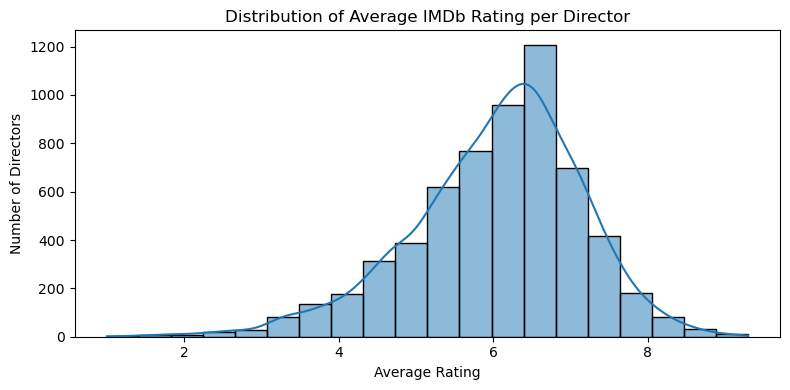

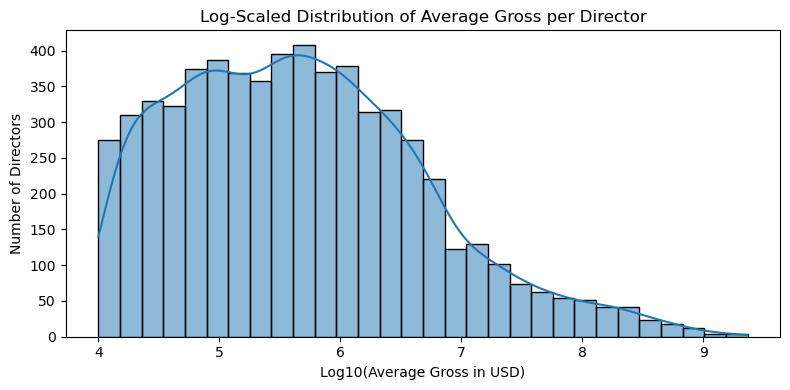

In [65]:
director_ratings = defaultdict(list)
director_grosses = defaultdict(list)

for _, row in movie_dataset.iterrows():
    director = row["director"]
    director_ratings[director].append(row["averageRating"])
    director_grosses[director].append(row["grossWorldwide"])

#  average rating and gross per director
avg_director_ratings = [np.mean(ratings) for ratings in director_ratings.values()]
avg_director_grosses = [np.mean(grosses) for grosses in director_grosses.values()]

**Distribution of average director ratings**

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(avg_director_ratings, bins=20, kde=True)
plt.title("Distribution of Average IMDb Rating per Director")
plt.xlabel("Average Rating")
plt.ylabel("Number of Directors")
plt.tight_layout()
plt.show()

This histogram shows how average IMDb ratings are distributed across directors in the dataset.

Key Observations:
The distribution is roughly normal, centered around a mean rating of 6.0 to 6.5, which aligns with typical IMDb averages. Most directors have average ratings between 5 and 7, indicating that the majority consistently deliver mid-rated films. A smaller number of directors have very high or very low averages, forming the long tails on either end. The right tail is slightly longer, suggesting a few directors consistently make well-received films, while very low-rated directors are rarer.

This distribution helps establish a baseline for director performance. Directors with average ratings well above this norm may be particularly valuable in predictive models, especially if rating is a target variable. It also highlights that rating alone doesn't drastically separate most directors, so combining this with consistency or gross performance could give better signals.

**Distribution of average director gross**

In [ ]:
log_avg_director_grosses = [np.log10(g) for g in avg_director_grosses if g > 0]

plt.figure(figsize=(8, 4))
sns.histplot(log_avg_director_grosses, bins=30, kde=True)
plt.title("Log-Scaled Distribution of Average Gross per Director")
plt.xlabel("Log10(Average Gross in USD)")
plt.ylabel("Number of Directors")
plt.tight_layout()
plt.show()

This histogram shows the distribution of **average worldwide gross income per director**, plotted on a **log10 scale** to better capture the large spread in revenue values.

Key Observations:
The distribution is right-skewed, meaning most directors are associated with modest box office earnings (log10 between 5 and 6 → roughly \$100K to \$1M). A small number of directors have very high average grosses (log10 > 7 → \$10M+), creating a long tail. This shape is typical for financial data, where a few individuals or projects account for a disproportionate share of revenue.

The skewed nature of director gross income shows that commercial success is heavily concentrated, with a few directors consistently tied to high-earning films. These high-grossing directors can act as strong predictors of box office success and may serve as proxies for budget and production scale in our modeling pipeline.

---
**<u>Top 20 Directors by Rating Efficiency + Consistency</u>**

To evaluate directors more robustly, we compute a **combined score** based on both:
- **Efficiency**: Average IMDb rating, weighted by number of votes
- **Consistency**: Stability in ratings across films (low variance = high consistency)
Just like we dif for actors.

Using the `compute_score` function, we rank directors who consistently deliver high-rated films with substantial audience engagement.

The bar chart shows the top 20 directors according to this metric, helping identify those who not only direct well-received movies but do so reliably, a valuable signal for predictive modeling.

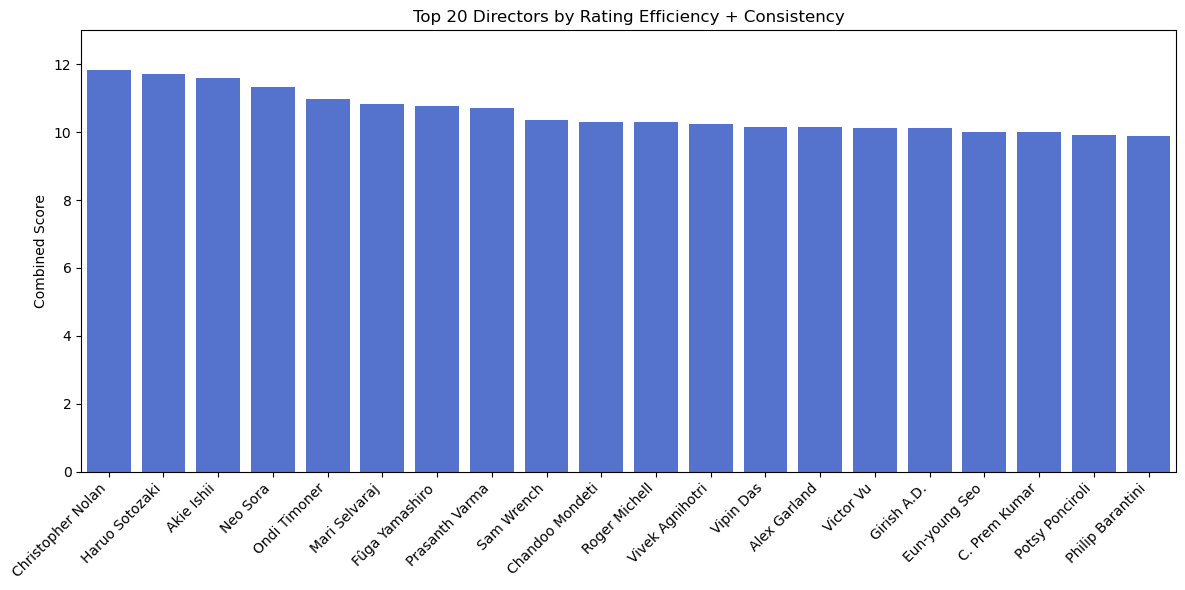

In [66]:
# (director, rating, numVotes)
director_rating_votes_data = list(zip(
    movie_dataset["director"],
    movie_dataset["averageRating"],
    movie_dataset["numVotes"]
))

# scores
rating_score = compute_score(
    director_rating_votes_data,
    min_std=0.5,
    weighted=True
)

# Top 20
top_rating_directors = sorted(rating_score.items(), key=lambda x: x[1], reverse=True)[:20]
names_r, scores_r = zip(*top_rating_directors)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(names_r), y=list(scores_r), color="royalblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Combined Score")
plt.title("Top 20 Directors by Rating Efficiency + Consistency")
plt.ylim(0, 13) 
plt.tight_layout()
plt.show()

Notably, **Christopher Nolan** ranks at the top, aligning with his strong reputation for directing critically acclaimed films. Other names like **Haruo Sotozaki** and **Prasanth Varma** also stand out for their consistently well-received work, even if they are less globally prominent.

This metric adds meaningful value to our modeling process, especially in the absence of direct budget information. Directors with a track record of producing highly rated films may serve as proxies for production quality and investment. As such, director features could enhance our model’s ability to predict outcomes like movie ratings or box office performance.

---

**<u>Top Directors by Gross Efficiency and Consistency</u>**

This chart shows the top 20 directors based on a combined score of box office efficiency (average gross revenue) and consistency (adjusted by standard deviation, with a $100K minimum threshold). 

Directors at the top of this ranking—such as those with multiple commercially successful films—demonstrate not only the ability to generate high revenue but also to do so consistently.

Because direct budget data is missing from our dataset, this analysis is particularly useful. **High-grossing directors** often work with larger budgets and more prominent studios, so their presence can serve as a **proxy for production scale**. This insight is valuable for feature engineering in predictive modeling, as it can help the model indirectly infer budget or financial backing based on the director alone.


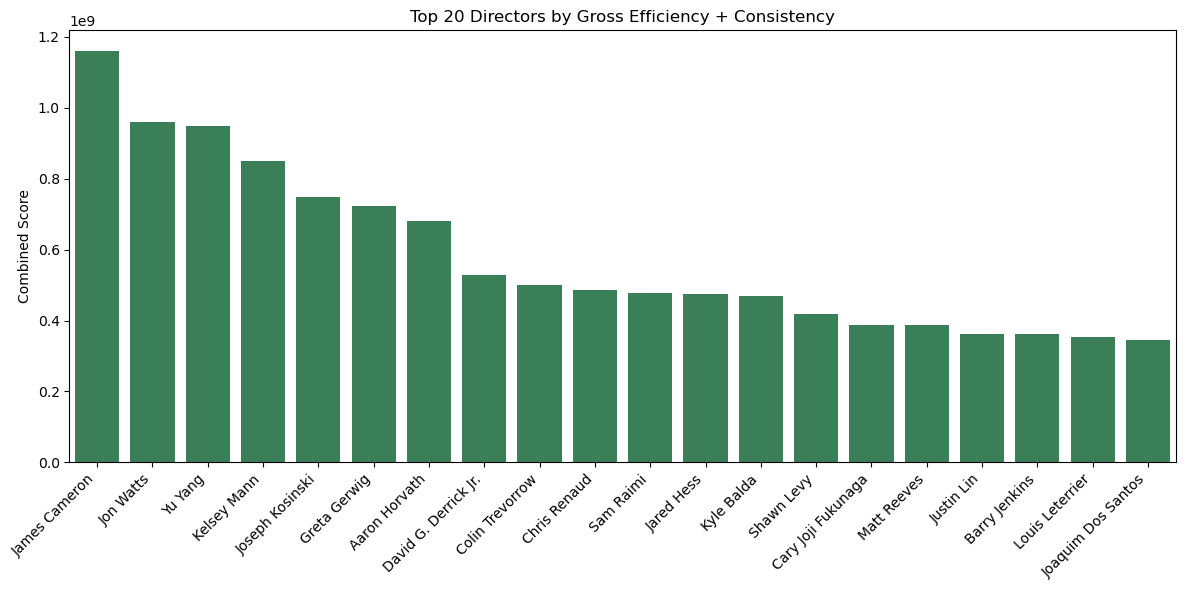

In [67]:
# (director, gross)
director_gross_data = list(zip(
    movie_dataset["director"],
    movie_dataset["grossWorldwide"]
))

# Compute scores
gross_score = compute_score(director_gross_data, min_std=1e5, weighted=False)

# Top 20
top_gross_directors = sorted(gross_score.items(), key=lambda x: x[1], reverse=True)[:20]
names_g, scores_g = zip(*top_gross_directors)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(names_g), y=list(scores_g), color="seagreen")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Combined Score")
plt.title("Top 20 Directors by Gross Efficiency + Consistency")
plt.tight_layout()
plt.show()

The chart above highlights the 20 directors who consistently deliver the highest global box office performance. Topping the list are well-known names like **James Cameron** and **Greta Gerwig**, whose films tend to perform reliably well financially.

This metric combines average gross with consistency, ensuring that directors who succeed repeatedly (not just with one blockbuster) are prioritized. It helps surface not just big names, but also those who fly under the radar yet consistently perform.

As we lack direct budget data in our dataset, these gross performance scores can act as a **proxy for production scale**. Directors with high and stable earnings are likely trusted with bigger projects and budgets, making this feature especially relevant for downstream predictive modeling tasks, such as estimating box office returns or determining movie success potential.

A few concluding remarks about the actor analysis:
- Most of the actors had a handful of films they appeared in, with only a few dominating the dataset
- There's a big presence of Bollywood movies 
- Gross revenue was highly skewed while IMDb ratings were normally distributed.
- For both actors and directors, we computed consistency and efficiency scores, which showed that the most active were not always the most successful.
- We also created separate rankings based on gross vs rating revealed the level of critical versus commercial success differing.
- We looked at the co-occurring actors and their “star power” or sum of actor frequencies, which showed a weak but noticeable correlation with box office earnings.

###  Conclusion: Actor Analysis

Our investigation into actor-related features revealed valuable insights for future modeling. While raw frequency of appearances showed limited correlation with movie ratings, combining metrics like **average rating, consistency, and vote count** highlighted high-performing actors. Additionally, evaluating **gross revenue per actor** provided a useful proxy for their commercial impact.

Interestingly, analyzing **actor pairs** uncovered that certain collaborations are associated with significantly higher average ratings or gross revenues. This suggests that the synergy between specific actors could be an important signal for both quality and commercial success.

Given that **budget data is missing**, well-known or consistently high-grossing actors can serve as a **proxy for production investment**, helping us estimate the scale and potential of a film. These actor-derived features can be incorporated into predictive models to enhance accuracy in forecasting movie outcomes such as rating or box office performance.


<hr style="height:2px;border-width:0;color:red;background-color:red">

### 3.9) Correlation Matrices
 
Next lets look at the correlations between individual numerical values. There are two reasons for this: 
- To see if any variables have a linear relationship with the average rating and gross income, which are proxies for our target variable.
- To see if there might be possible redundancies we haven't yet noticed such as two columns being highly linearly correlated. 

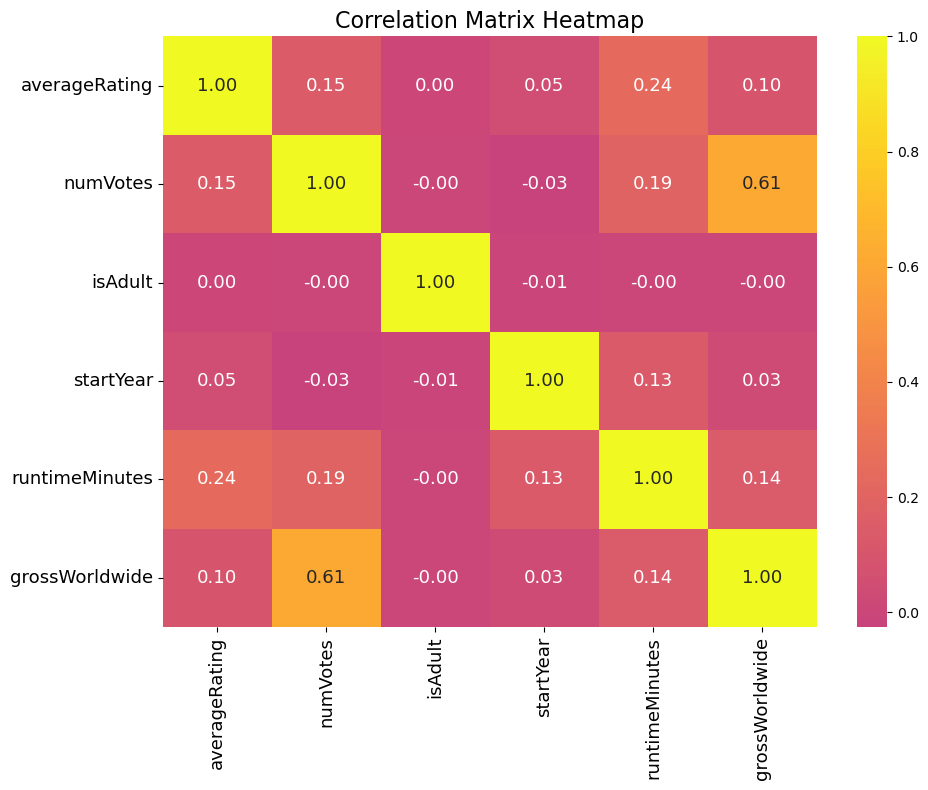

In [68]:
# Automatically select only numeric columns
numeric_df = movie_dataset.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='plasma', 
    center=0, 
    fmt=".2f",
    annot_kws={"size": 13}
)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()

As we can see in the matrix, there is only one strong linear relationship between the variables. Despite this, the other variables should not necessarily be discarded, since they may have nonlinear relationships that the correlation matrix does not capture. 

The matrix does reveal one clear insight: the number of votes a movie receives is by far the best linear predictor of whether it will become a blockbuster.

However, as explained earlier, this cannot be used to predict the likelihood of a movie becoming a blockbuster before release, since information about the number of votes only becomes available after production is complete and the movie hits the screen. Furthermore, the number of votes continues to increase long after the movie leaves theaters, as people watch it through other channels and rate it on IMDb, even though this later consumption no longer contributes to box office revenue. 

Therefore, we cannot include the number of votes in our model if we want it to be useful for predicting blockbuster status before release—when changes to the movie can still be made.

---
**<u>Genres</u>**

The 'genres' column is one of the only columns that is naturally categorical, without any need for preprocessing. However, it is plausible that genres co-occur and co-variate in patterns. 

An example of this are the genres biography and documentary, which are 2 of the genres we have. By their very nature, they are meant to co-occur together. Hence, we realized that in order to reduce risks of overfitting to the noise in our data (such as random omittance of genres where their covariates are included), dimension reduction might be a good idea as it could also decrease computational costs and training time, as well as making the model more generalizable. 

However, to implement dimension reduction, we must first confirm that the genres do indeed have significant covariances among them. Below is the variance covariance matrix of the genres: 

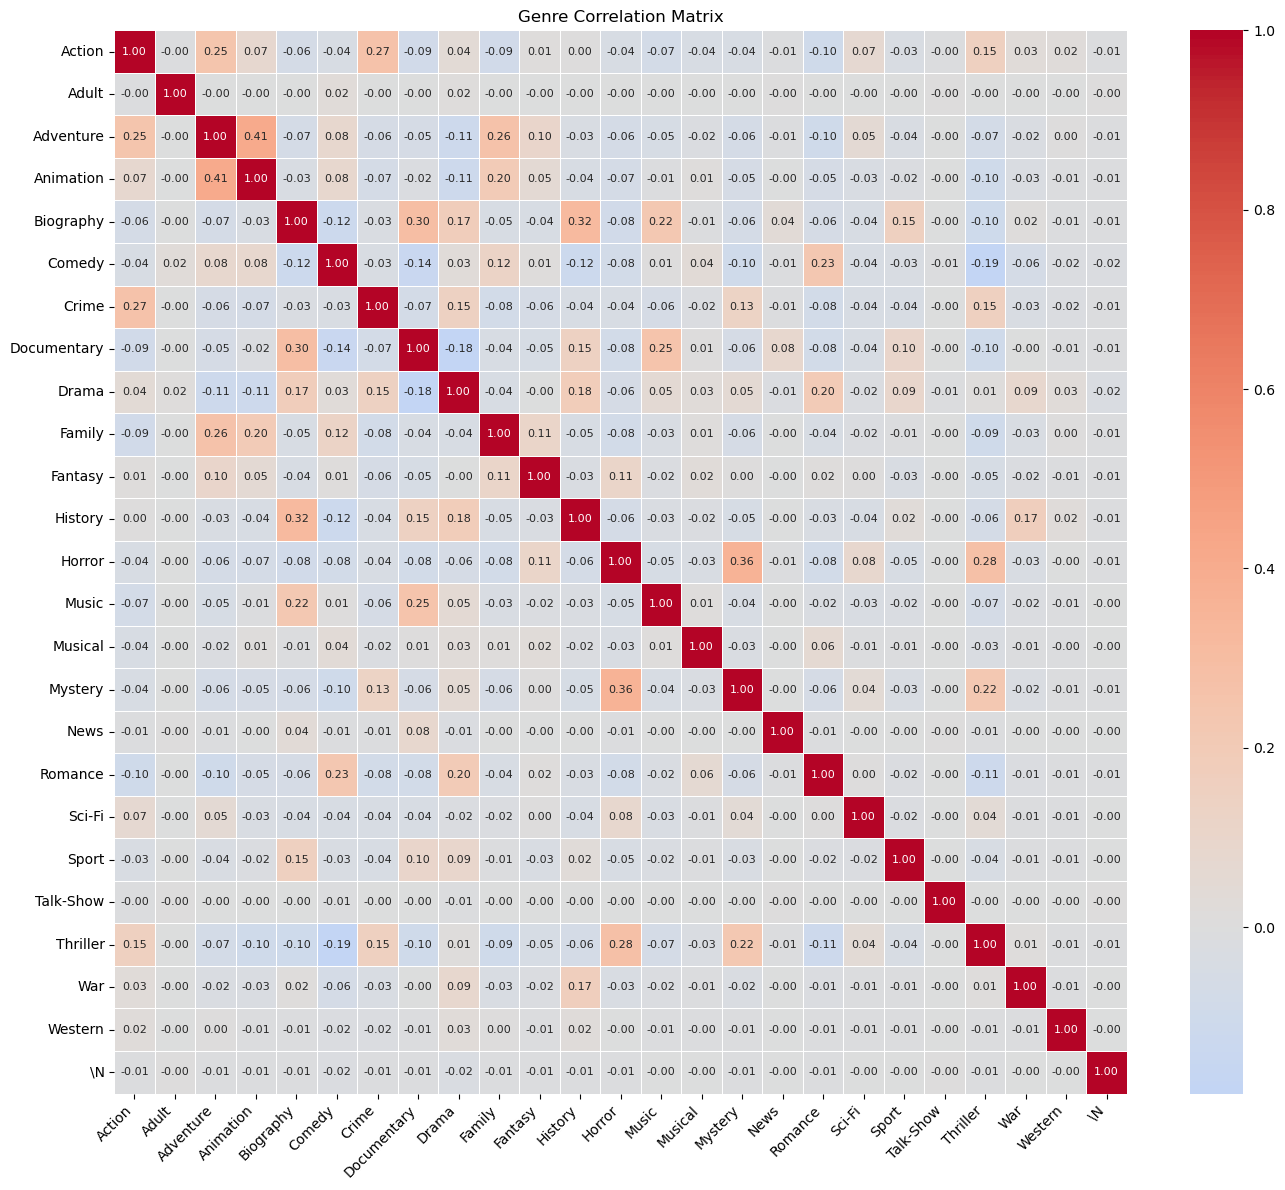

In [69]:
genres_split = movie_dataset['genres'].astype(str).str.split(',')
exploded = movie_dataset.copy()
exploded['genres'] = genres_split
exploded = exploded.explode('genres')

genre_dummies = pd.get_dummies(exploded['genres'])
movie_genre_matrix = exploded[['primaryTitle']].join(genre_dummies).groupby('primaryTitle').sum()

genre_correlation = movie_genre_matrix.corr()

import seaborn as sns
import matplotlib.pyplot as plt

if not genre_correlation.empty:
    plt.figure(figsize=(14, 12))
    sns.heatmap(genre_correlation, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                linewidths=0.5, annot_kws={"size": 8})
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title("Genre Correlation Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("Empty correlation matrix")

Although the correlations above aren't particularly high, some genres are very sparse in the dataset and thus contribute very little variance. Principal Component Analysis (PCA) naturally emphasizes dimensions (genres) with higher variance, meaning it focuses more on frequently occurring genres and downweights rare ones. 

As a result, PCA not only reduces dimensionality by capturing covariance structure, but also effectively omits low-variance (less informative) genres. This helps reduce noise, lowers the risk of overfitting, and limits the impact of rare, possibly spurious, features.

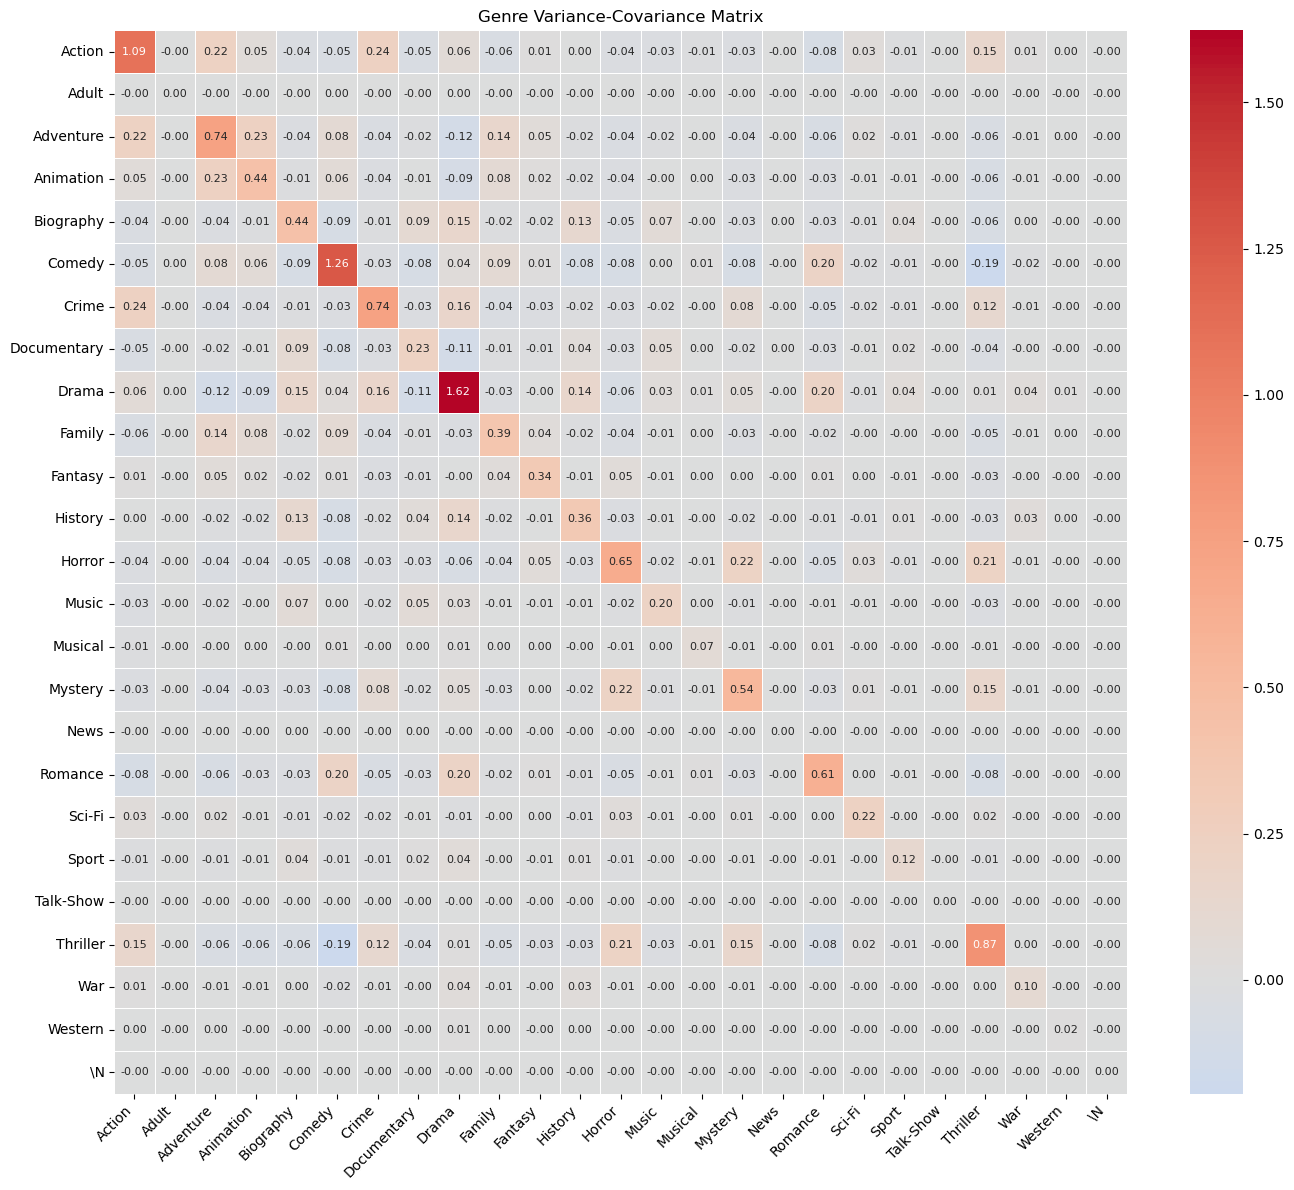

In [70]:
covariance_matrix = movie_genre_matrix.cov()

if not covariance_matrix.empty:
    plt.figure(figsize=(14, 12))
    sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                linewidths=0.5, annot_kws={"size": 8})
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title("Genre Variance-Covariance Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("Empty correlation matrix")

As seen in this variance-covariance matrix above, we have genres with variances smaller than 0.01. Given that no genre plausibly occurs in more than half of the movies (since movies usually have 1 to 3 genres and there are multiple popular genres), higher variance means more occurance in movies and more representation in our dataset. 

Hence, applying the dimension reduction will get rid of the spurious, rare and error prone genres that will not only not be informative but also can cause overfitting to the data, leading to lower generalizability.

<hr style="height:2px;border-width:0;color:red;background-color:red">

## 4) Conclusion

Now that we've finished the EDA, lets save the altered dataset so we can import it in the model.ipynb notebook:

In [71]:
movie_dataset.to_csv("datasets/7500_movies_dataset.csv")